In [7]:
!nvidia-smi

Sat Dec 30 16:30:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [8]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [9]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.5/8062.4 GB disk)


In [10]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [11]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="<Robofloe Key>")
project = rf.workspace("<workspace_name>").project("<project name>")
dataset = project.version(7).download("yolov8")


/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyterlab<5.0.0a0,>=4.0.6, but you have jupyterlab 4.0.5 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pytoolconfig 1.2.6 requires packaging>=22.0, but you have packaging 21.3 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflowjs 4.14.0 

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to waste-7 in yolov8:: 100%|██████████| 570/570 [00:00<00:00, 8633.75it/s]


## Custom Training

In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=75 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 152MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/waste-7/data.yaml, epochs=75, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

In [15]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch910.jpg
R_curve.png					   train_batch911.jpg
args.yaml					   train_batch912.jpg
confusion_matrix.png				   val_batch0_labels.jpg
events.out.tfevents.1703953976.488acf213407.164.0  val_batch0_pred.jpg
results.csv					   val_batch1_labels.jpg
results.png					   val_batch1_pred.jpg
train_batch0.jpg				   weights


/kaggle/working


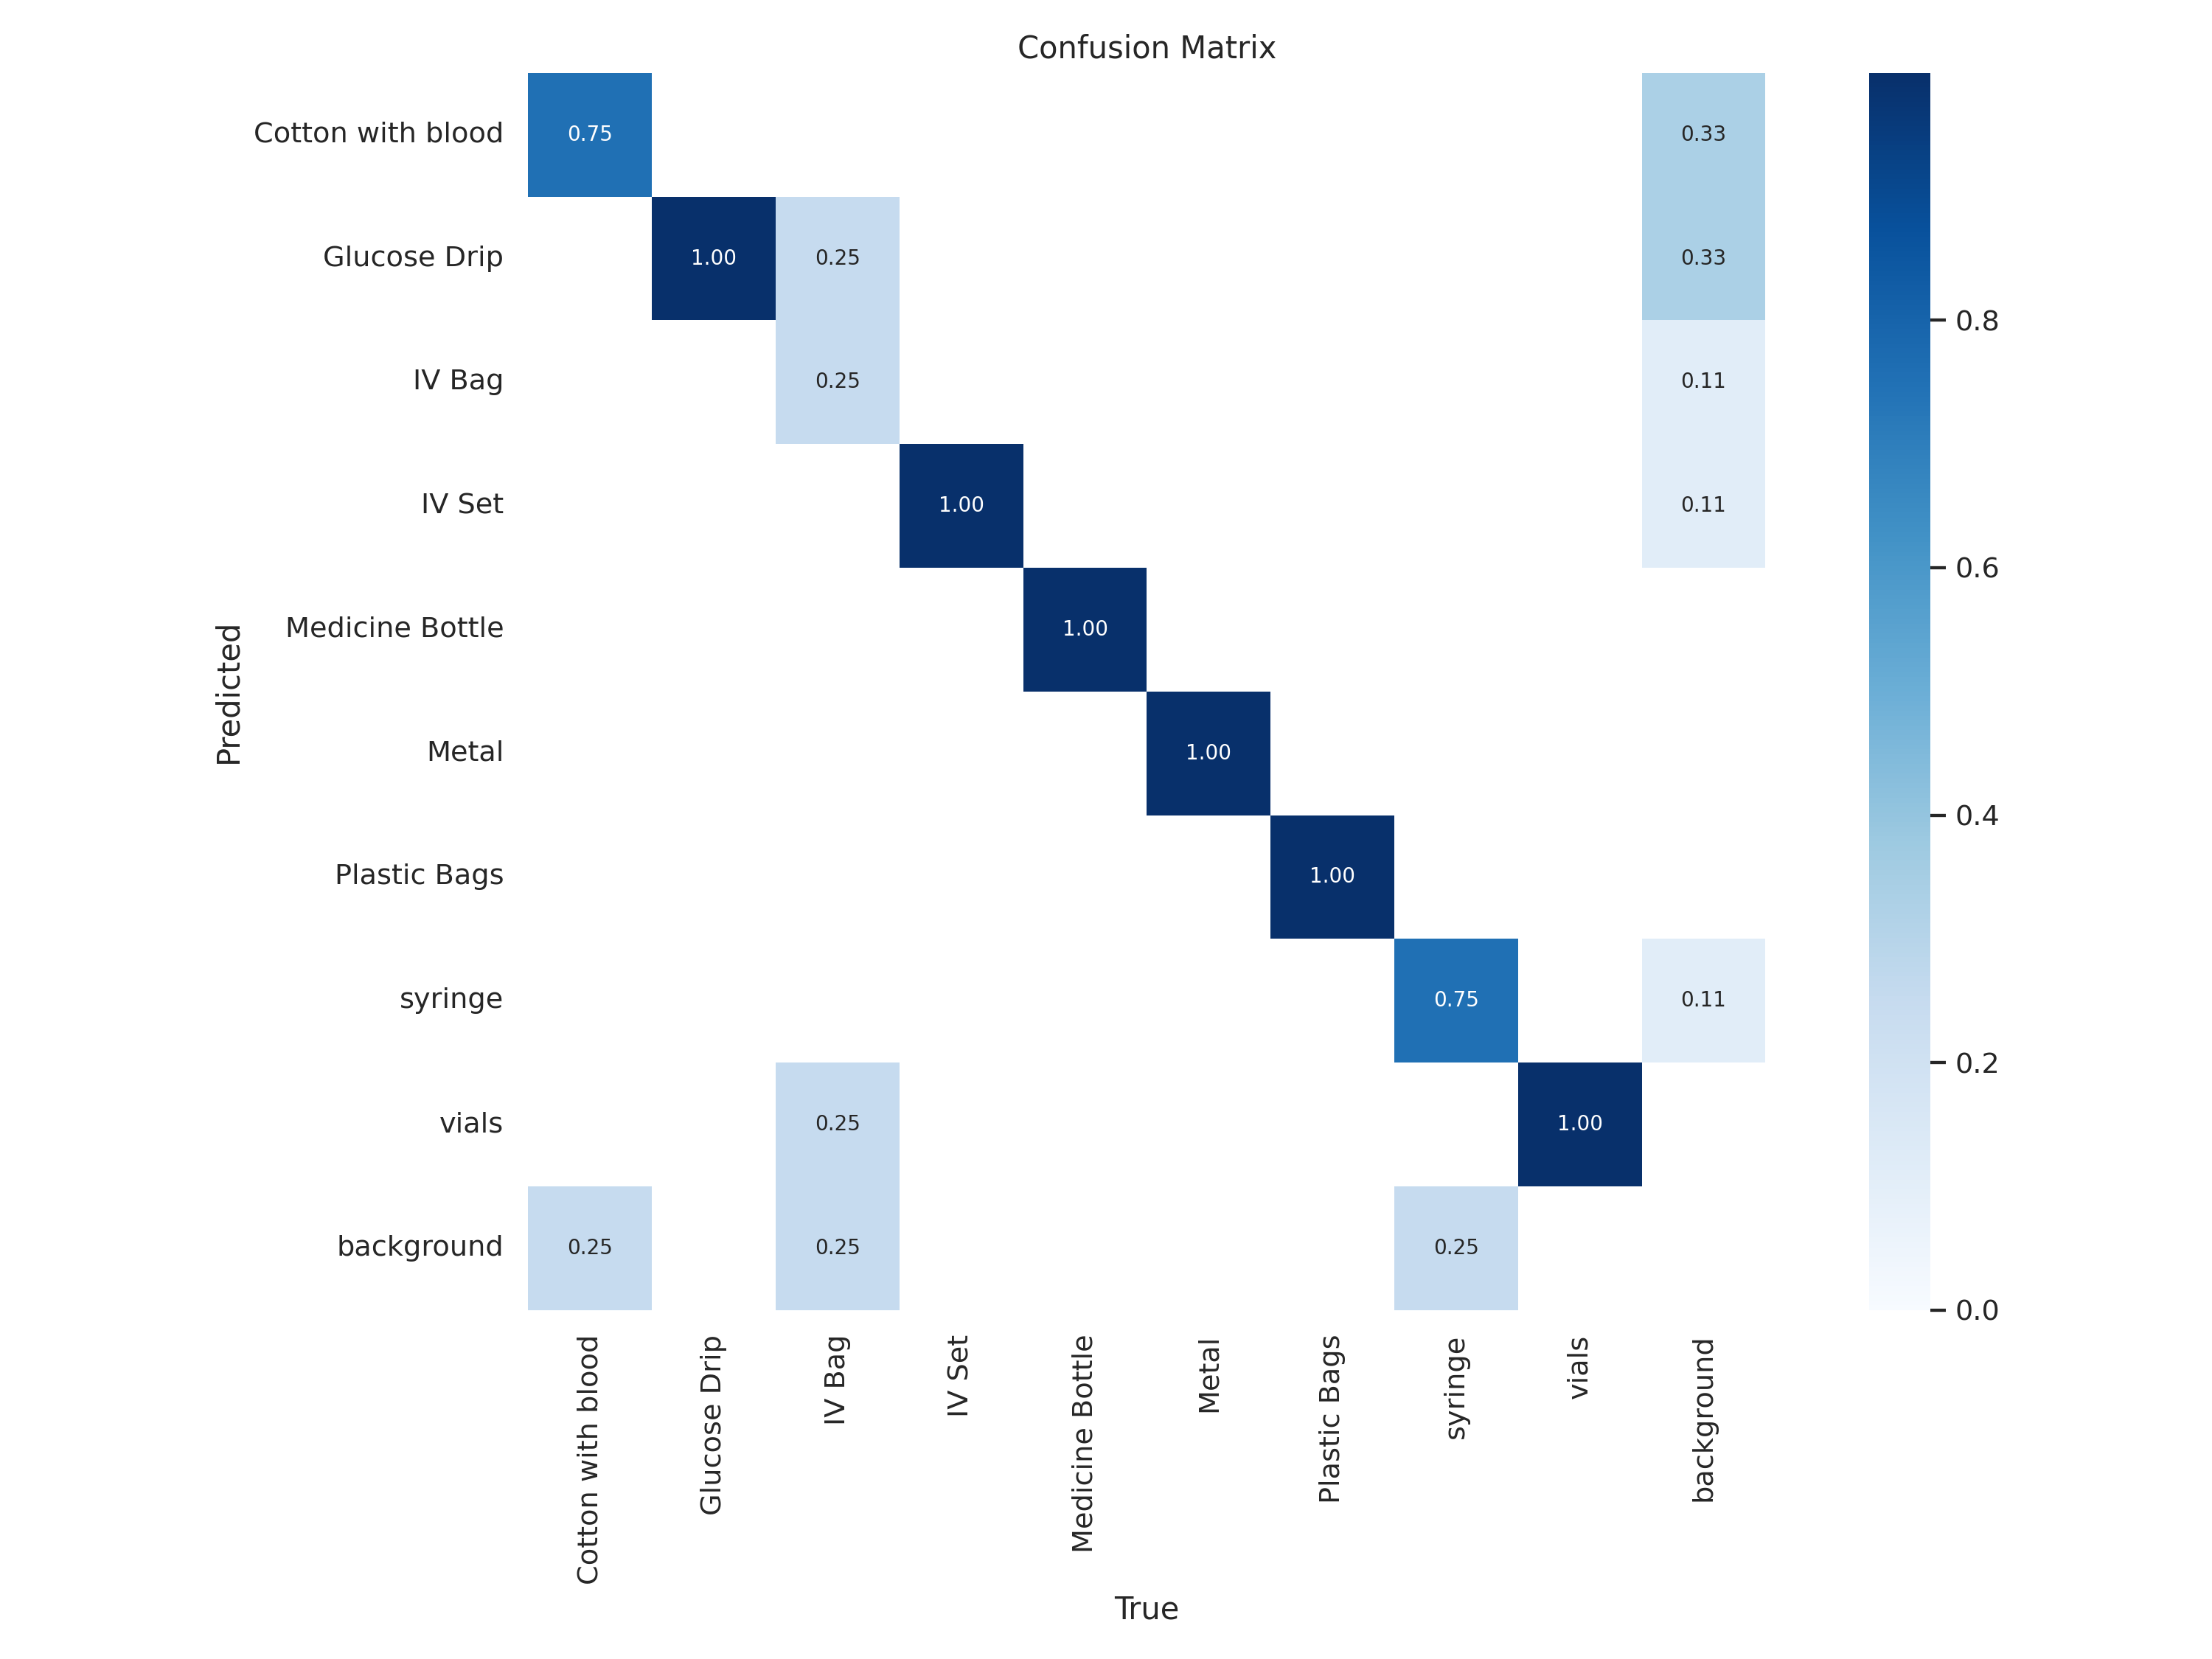

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


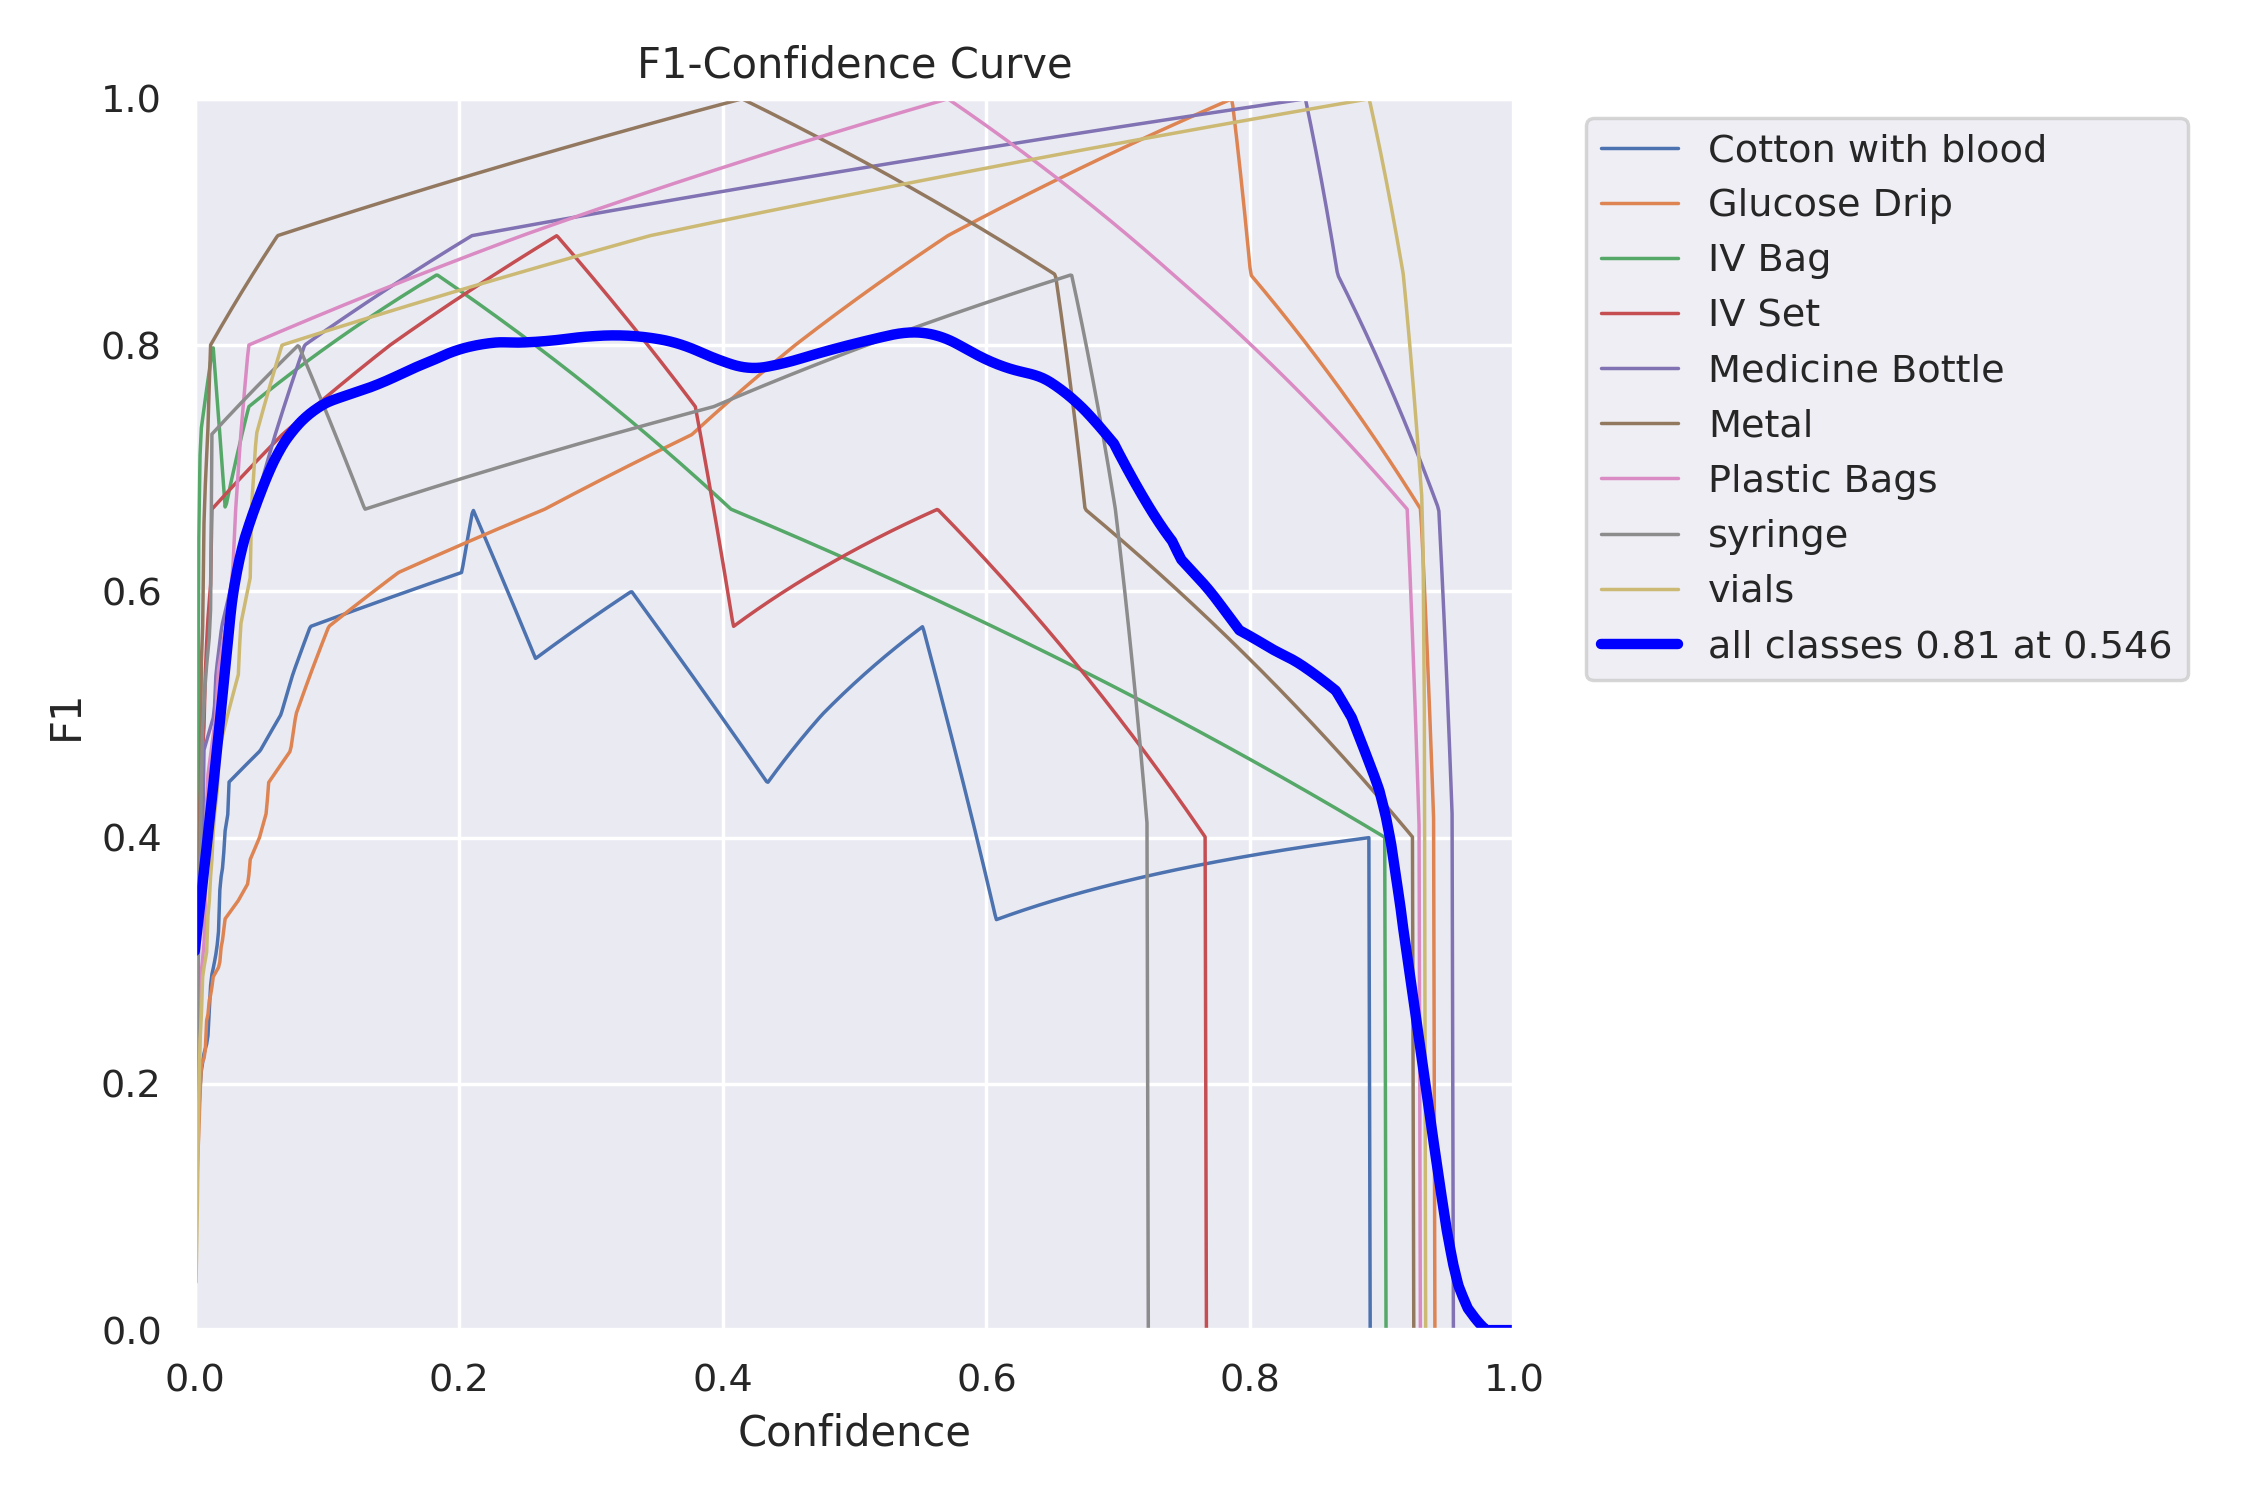

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/kaggle/working


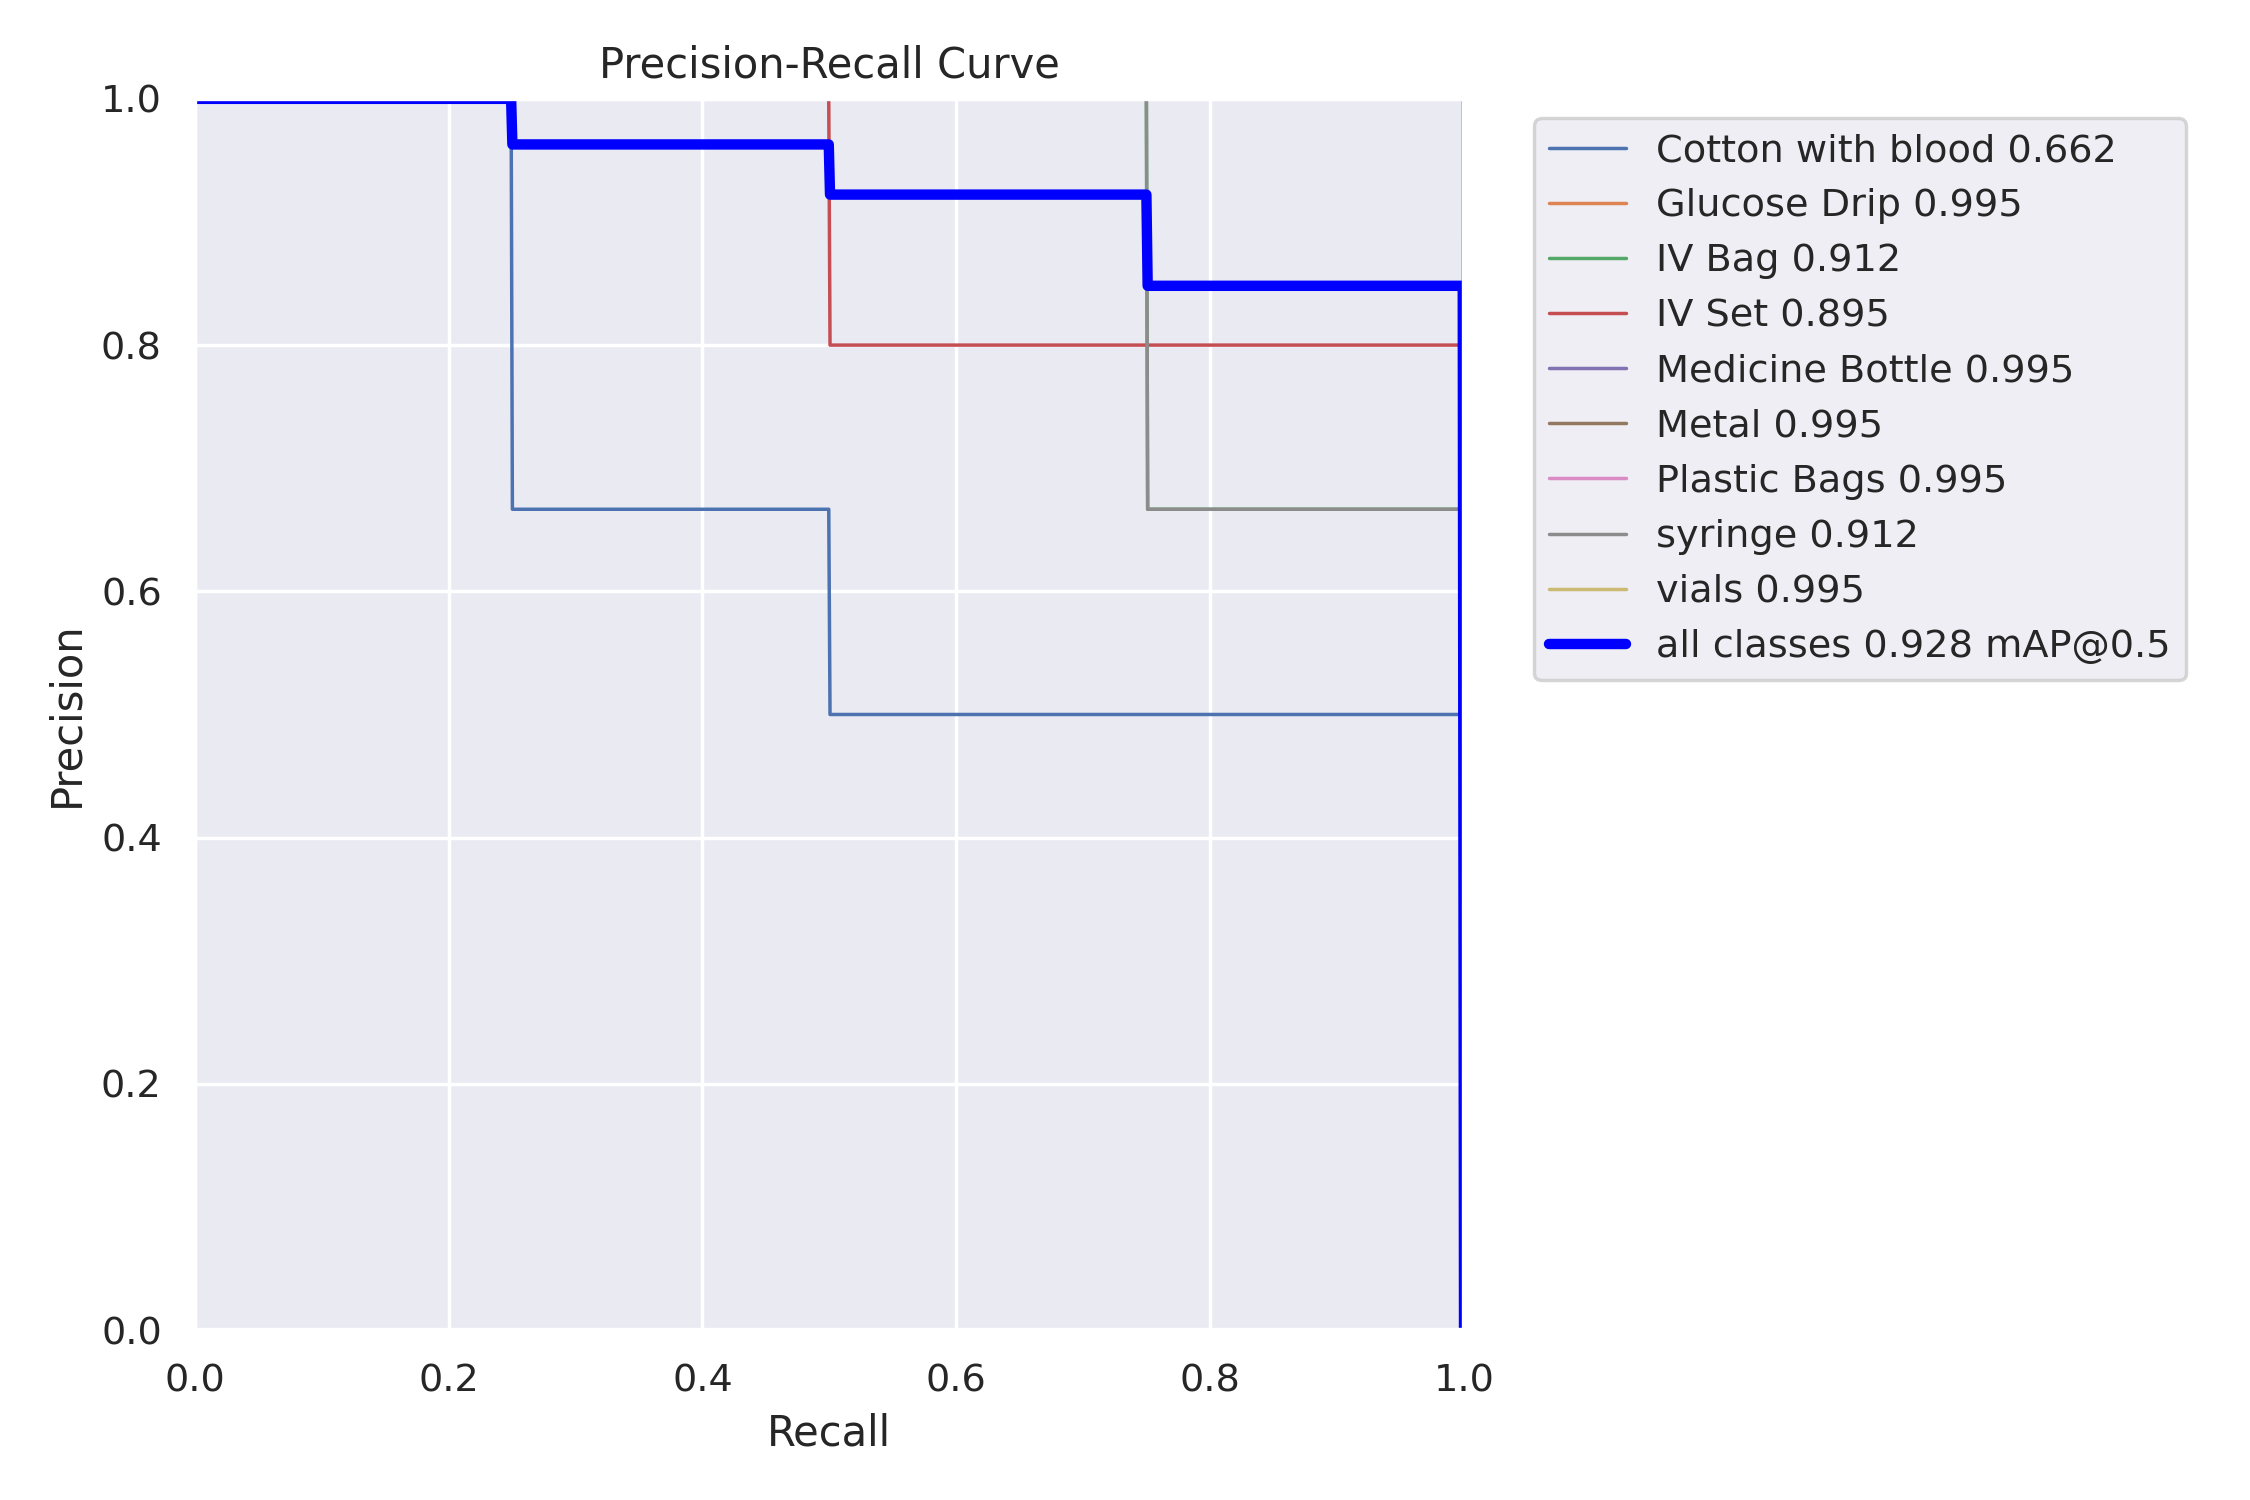

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

/kaggle/working


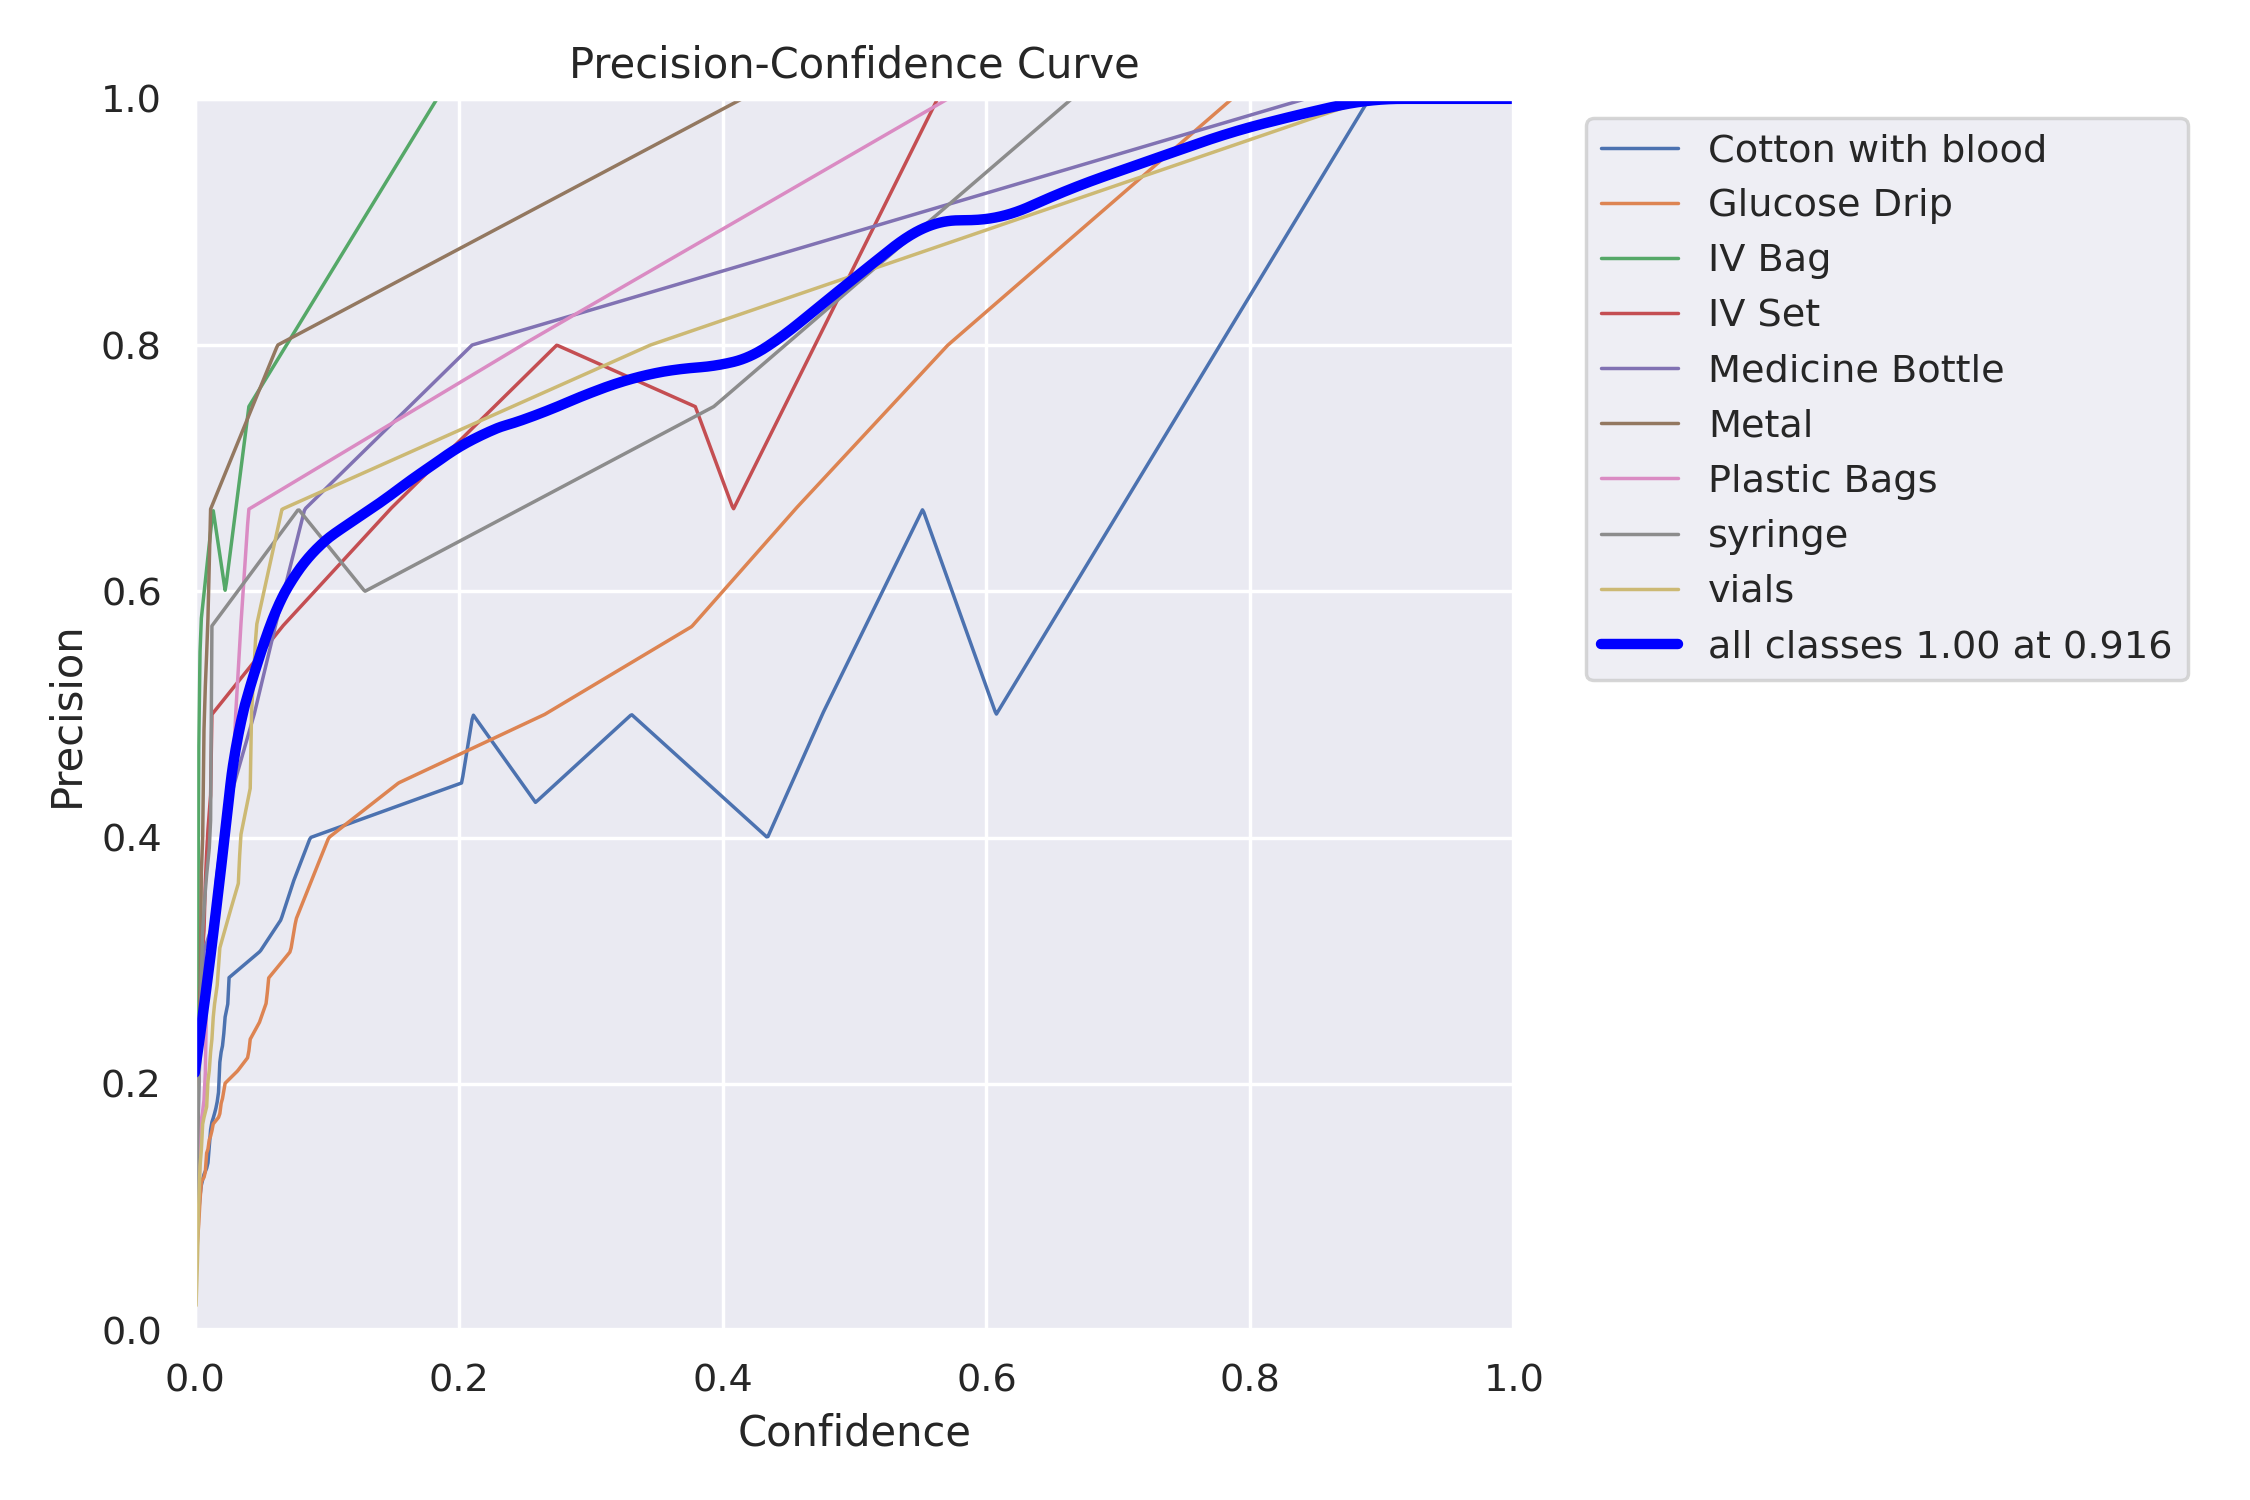

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

/kaggle/working


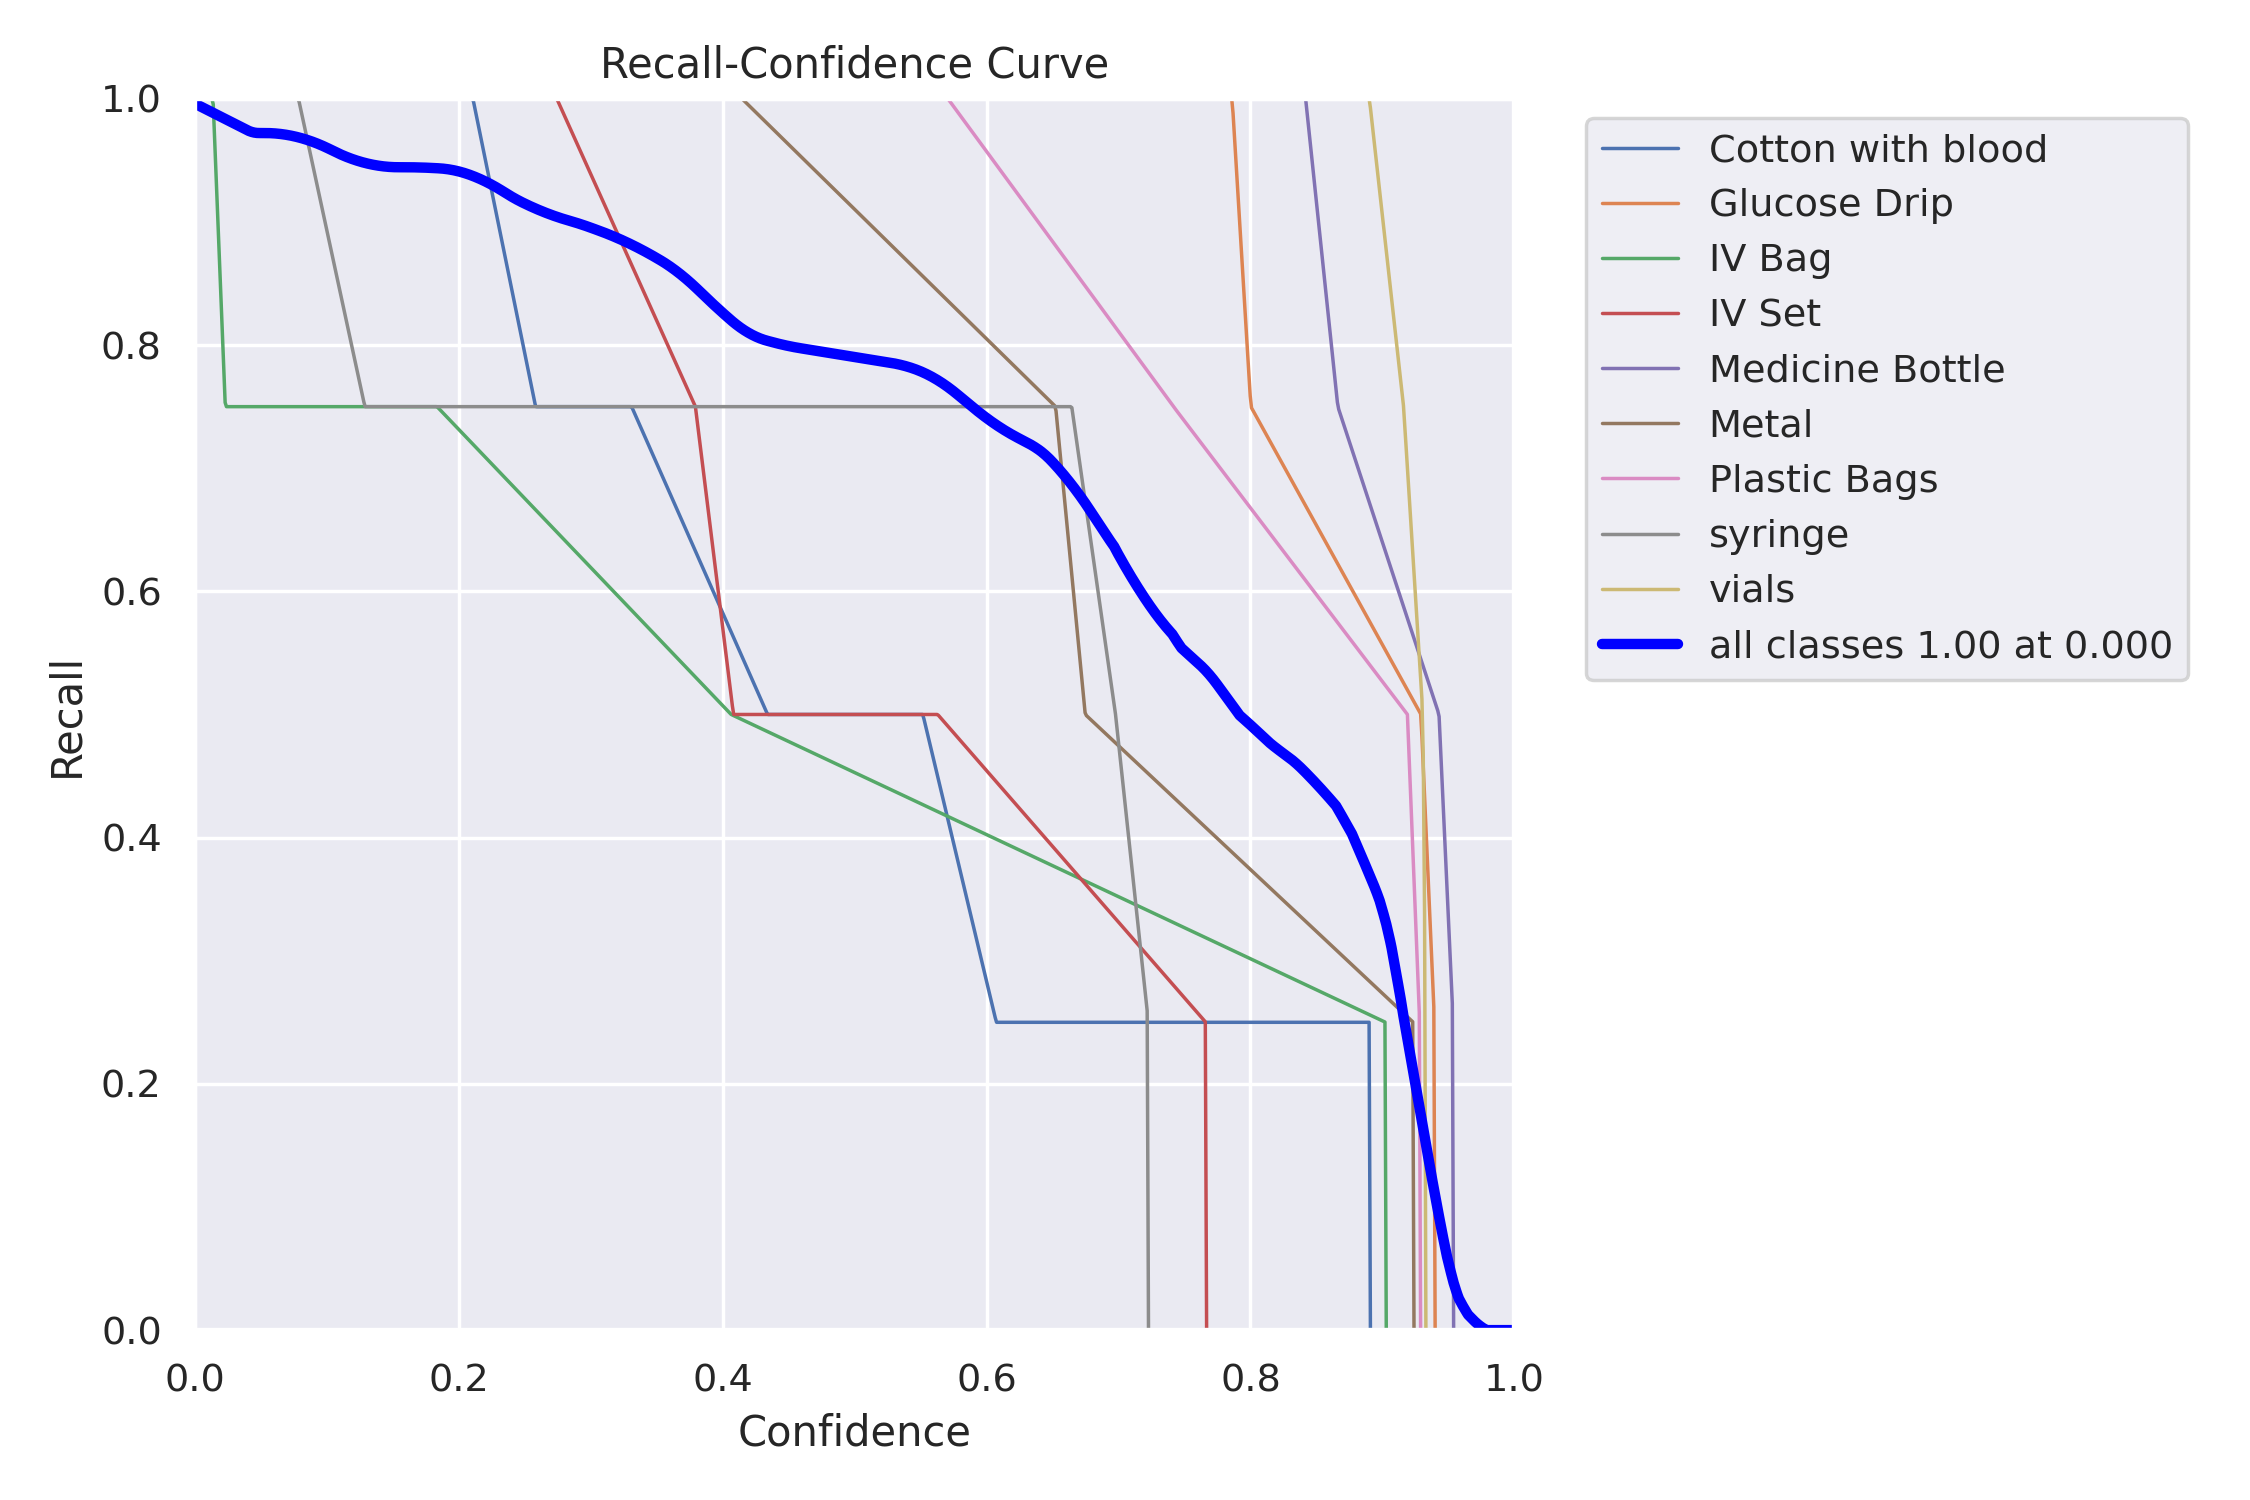

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

In [34]:
import pandas as pd

import os
home_directory = os.getenv('HOME')

file_path = os.path.join(f'{HOME}/runs/detect/train/results.csv')

df = pd.read_csv(file_path)
df.head(10)


epoch           train/box_loss           train/cls_loss  \
0                        0                  1.22470                   6.2276   
1                        1                  1.04700                   3.6622   
2                        2                  0.83306                   2.6741   
3                        3                  0.80532                   2.2569   
4                        4                  0.78309                   2.0512   
5                        5                  0.72096                   1.7968   
6                        6                  0.73189                   1.6496   
7                        7                  0.74980                   1.6106   
8                        8                  0.74012                   1.4649   
9                        9                  0.73590                   1.3506   

            train/dfl_loss     metrics/precision(B)  ...  \
0                   1.5647                  0.01018  ...   
1                   1.4734                  0.17692  ...   
2                   1.3154                  0.33908  ...   
3                   1.3020                  0.22512  ...   
4                   1.2971                  0.50515  ...   
5                   1.2508                  0.31461  ...   
6                   1.2116                  0.51450  ...   
7                   1.2306                  0.31735  ...   
8                   1.2070                  0.31562  ...   
9                   1.2081                  0.44274  ...   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                  14.2270                   2.6075                 0.088300   
1                   9.8221                   2.6046                 0.075664   
2                   3.9840                   2.5837                 0.062992   
3                   3.0893                   2.4328                 0.050282   
4                   2.9837                   2.4593                 0.037536   
5                   2.4741                   2.3687                 0.024752   
6                   2.7113                   2.6614                 0.011932   
7                   3.1337                   2.9199                 0.009076   
8                   2.7600                   2.4298                 0.009076   
9                   3.5299                   3.8161                 0.008944   

                    lr/pg1                   lr/pg2  
0                 0.001300                 0.001300  
1                 0.002664                 0.002664  
2                 0.003992                 0.003992  
3                 0.005282                 0.005282  
4                 0.006536                 0.006536  
5                 0.007752                 0.007752  
6                 0.008932                 0.008932  
7                 0.009076                 0.009076  
8                 0.009076                 0.009076  
9                 0.008944                 0.008944  

[10 rows x 14 columns]

/kaggle/working


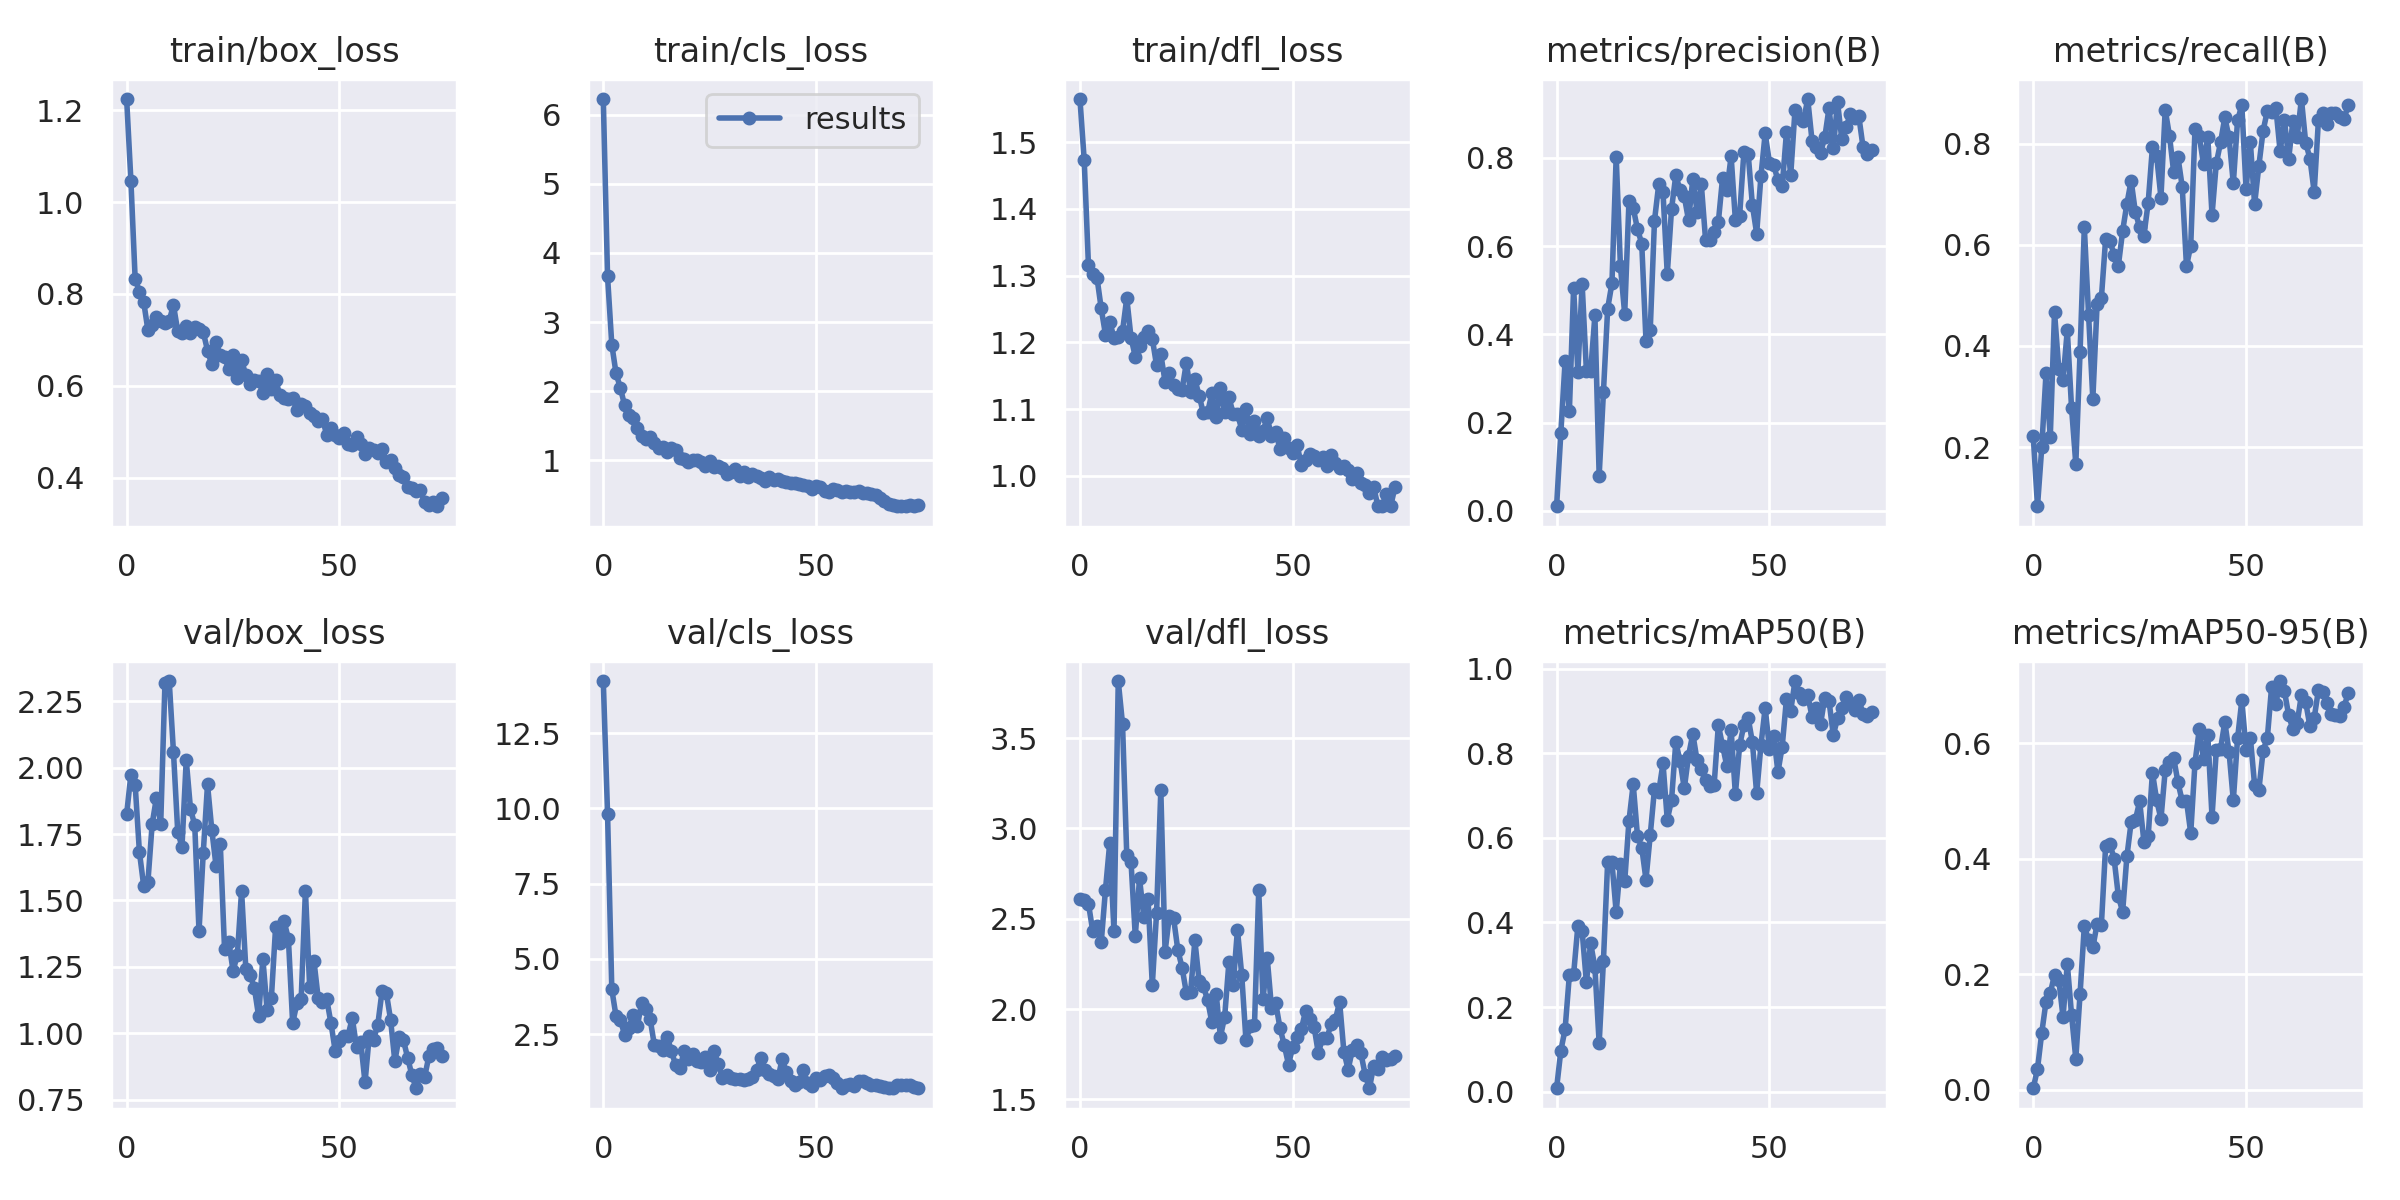

In [35]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


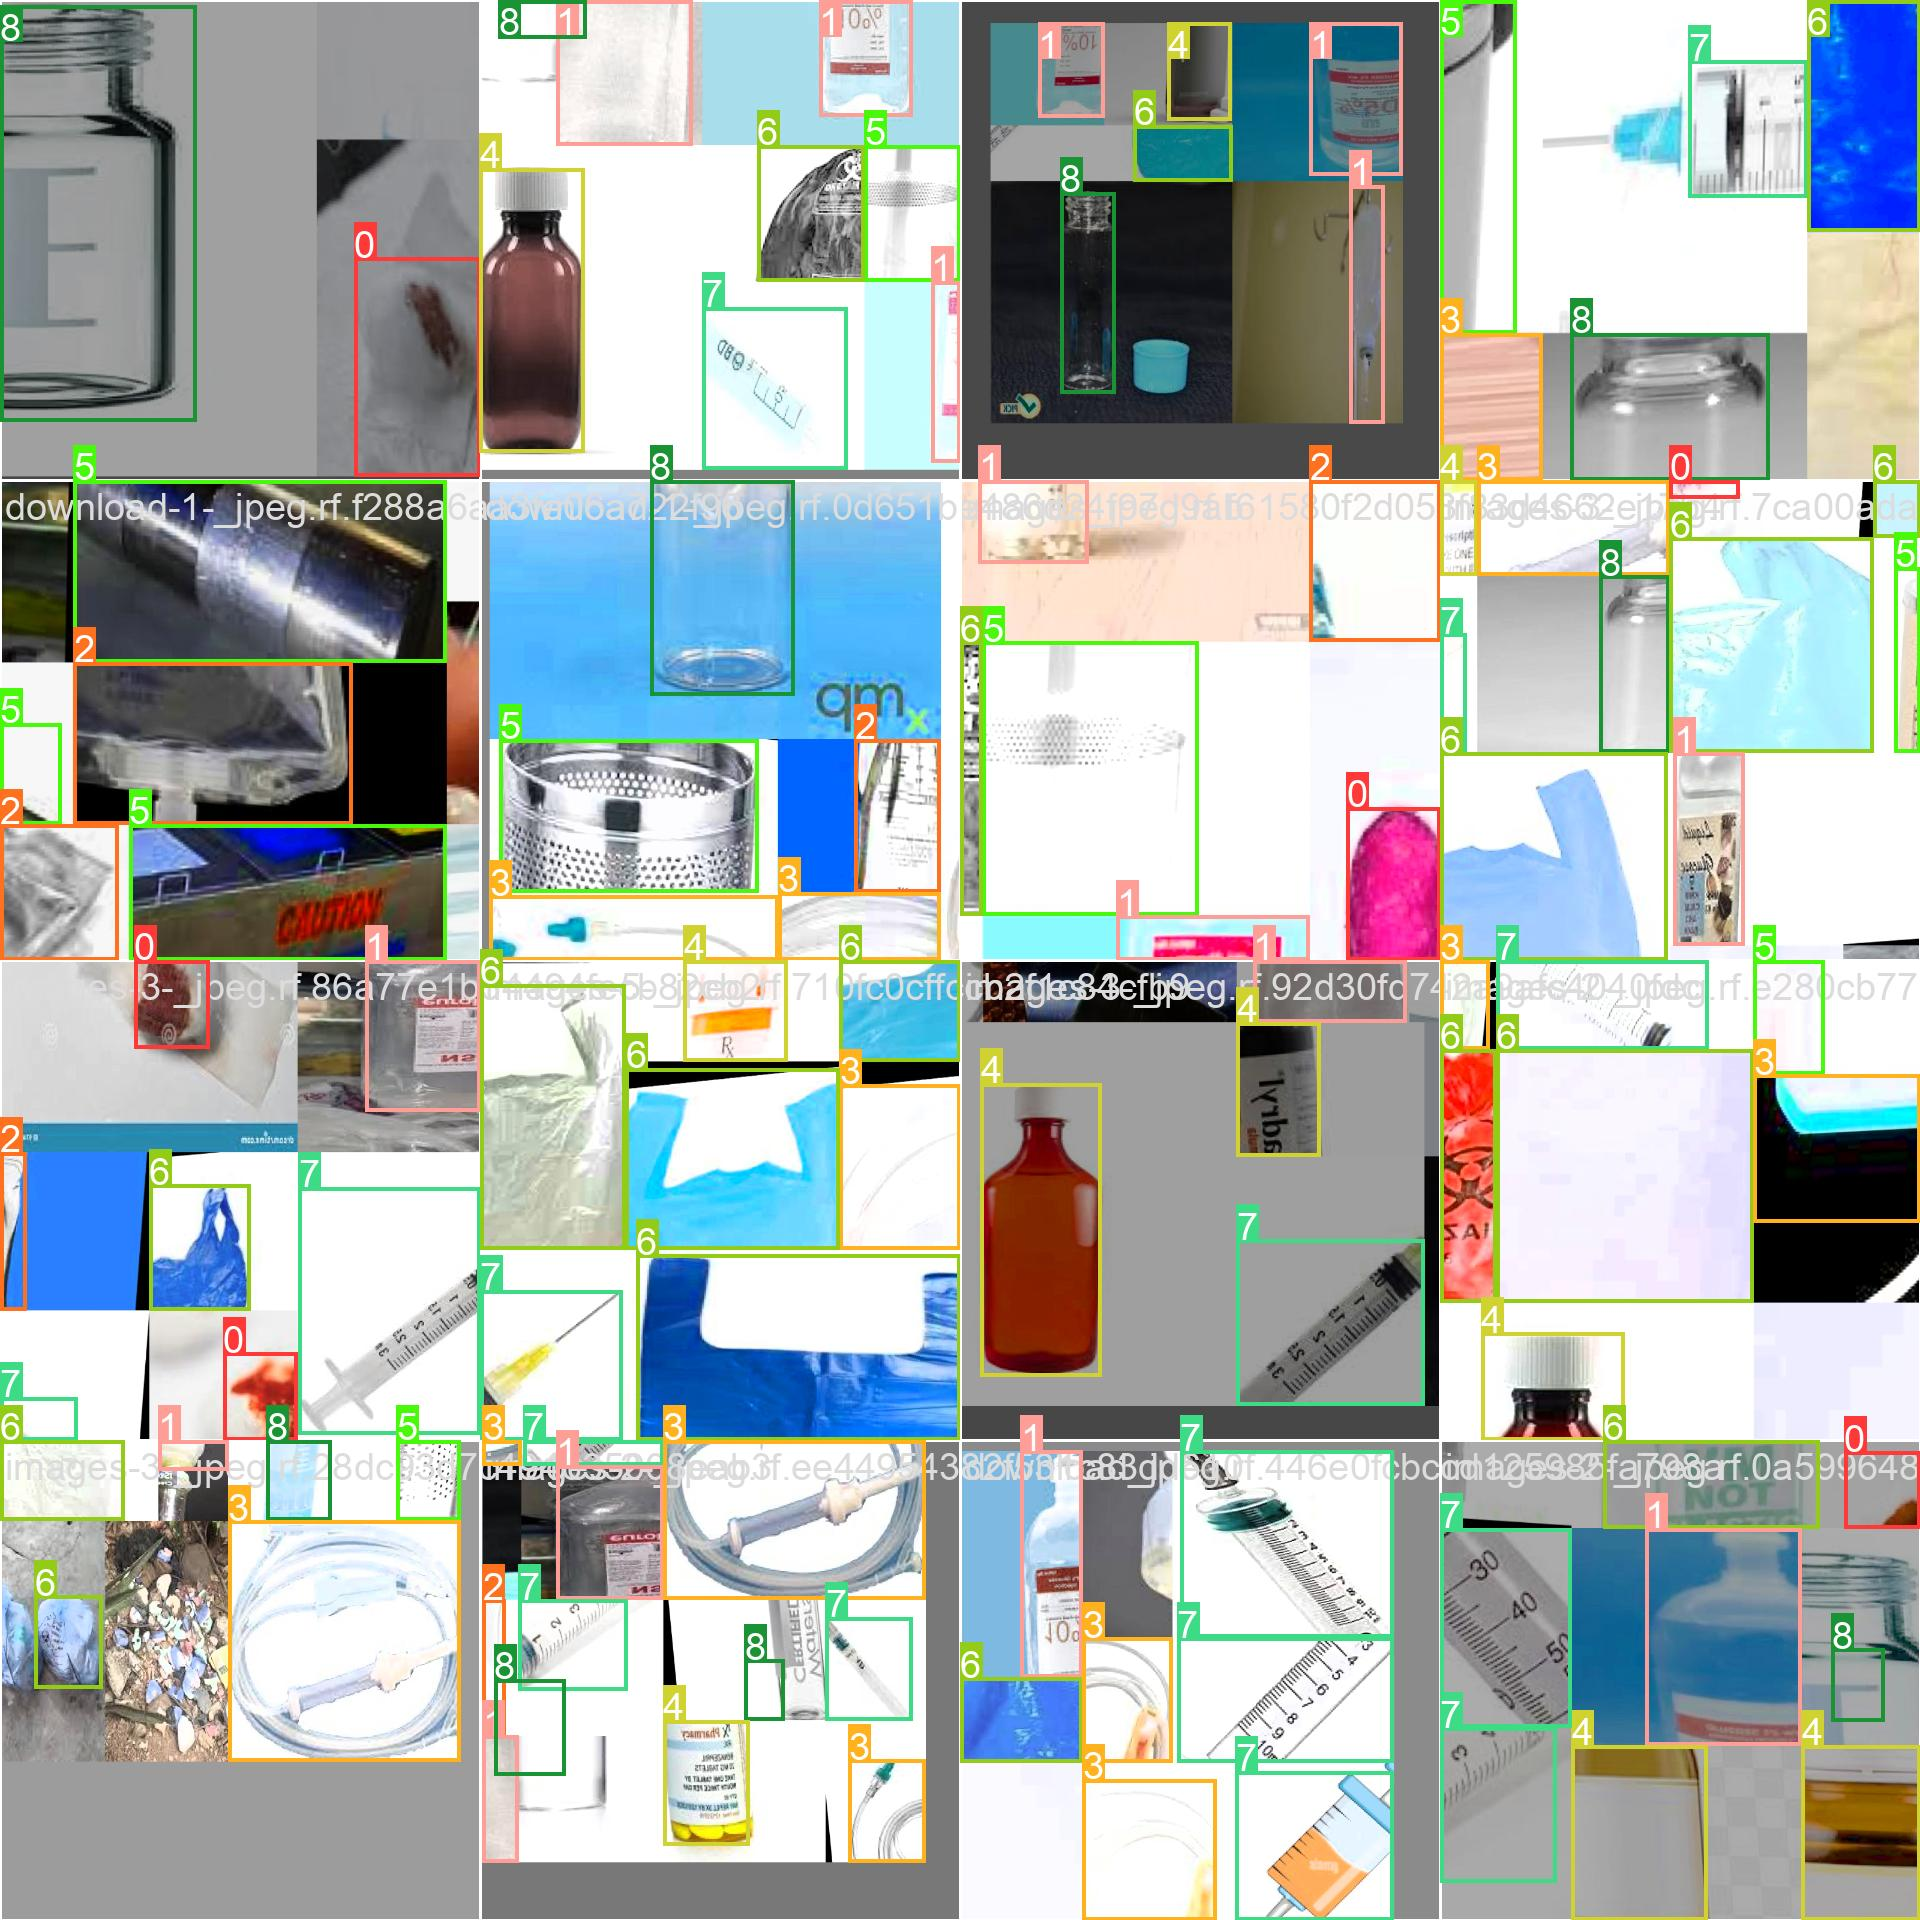

In [36]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

/kaggle/working


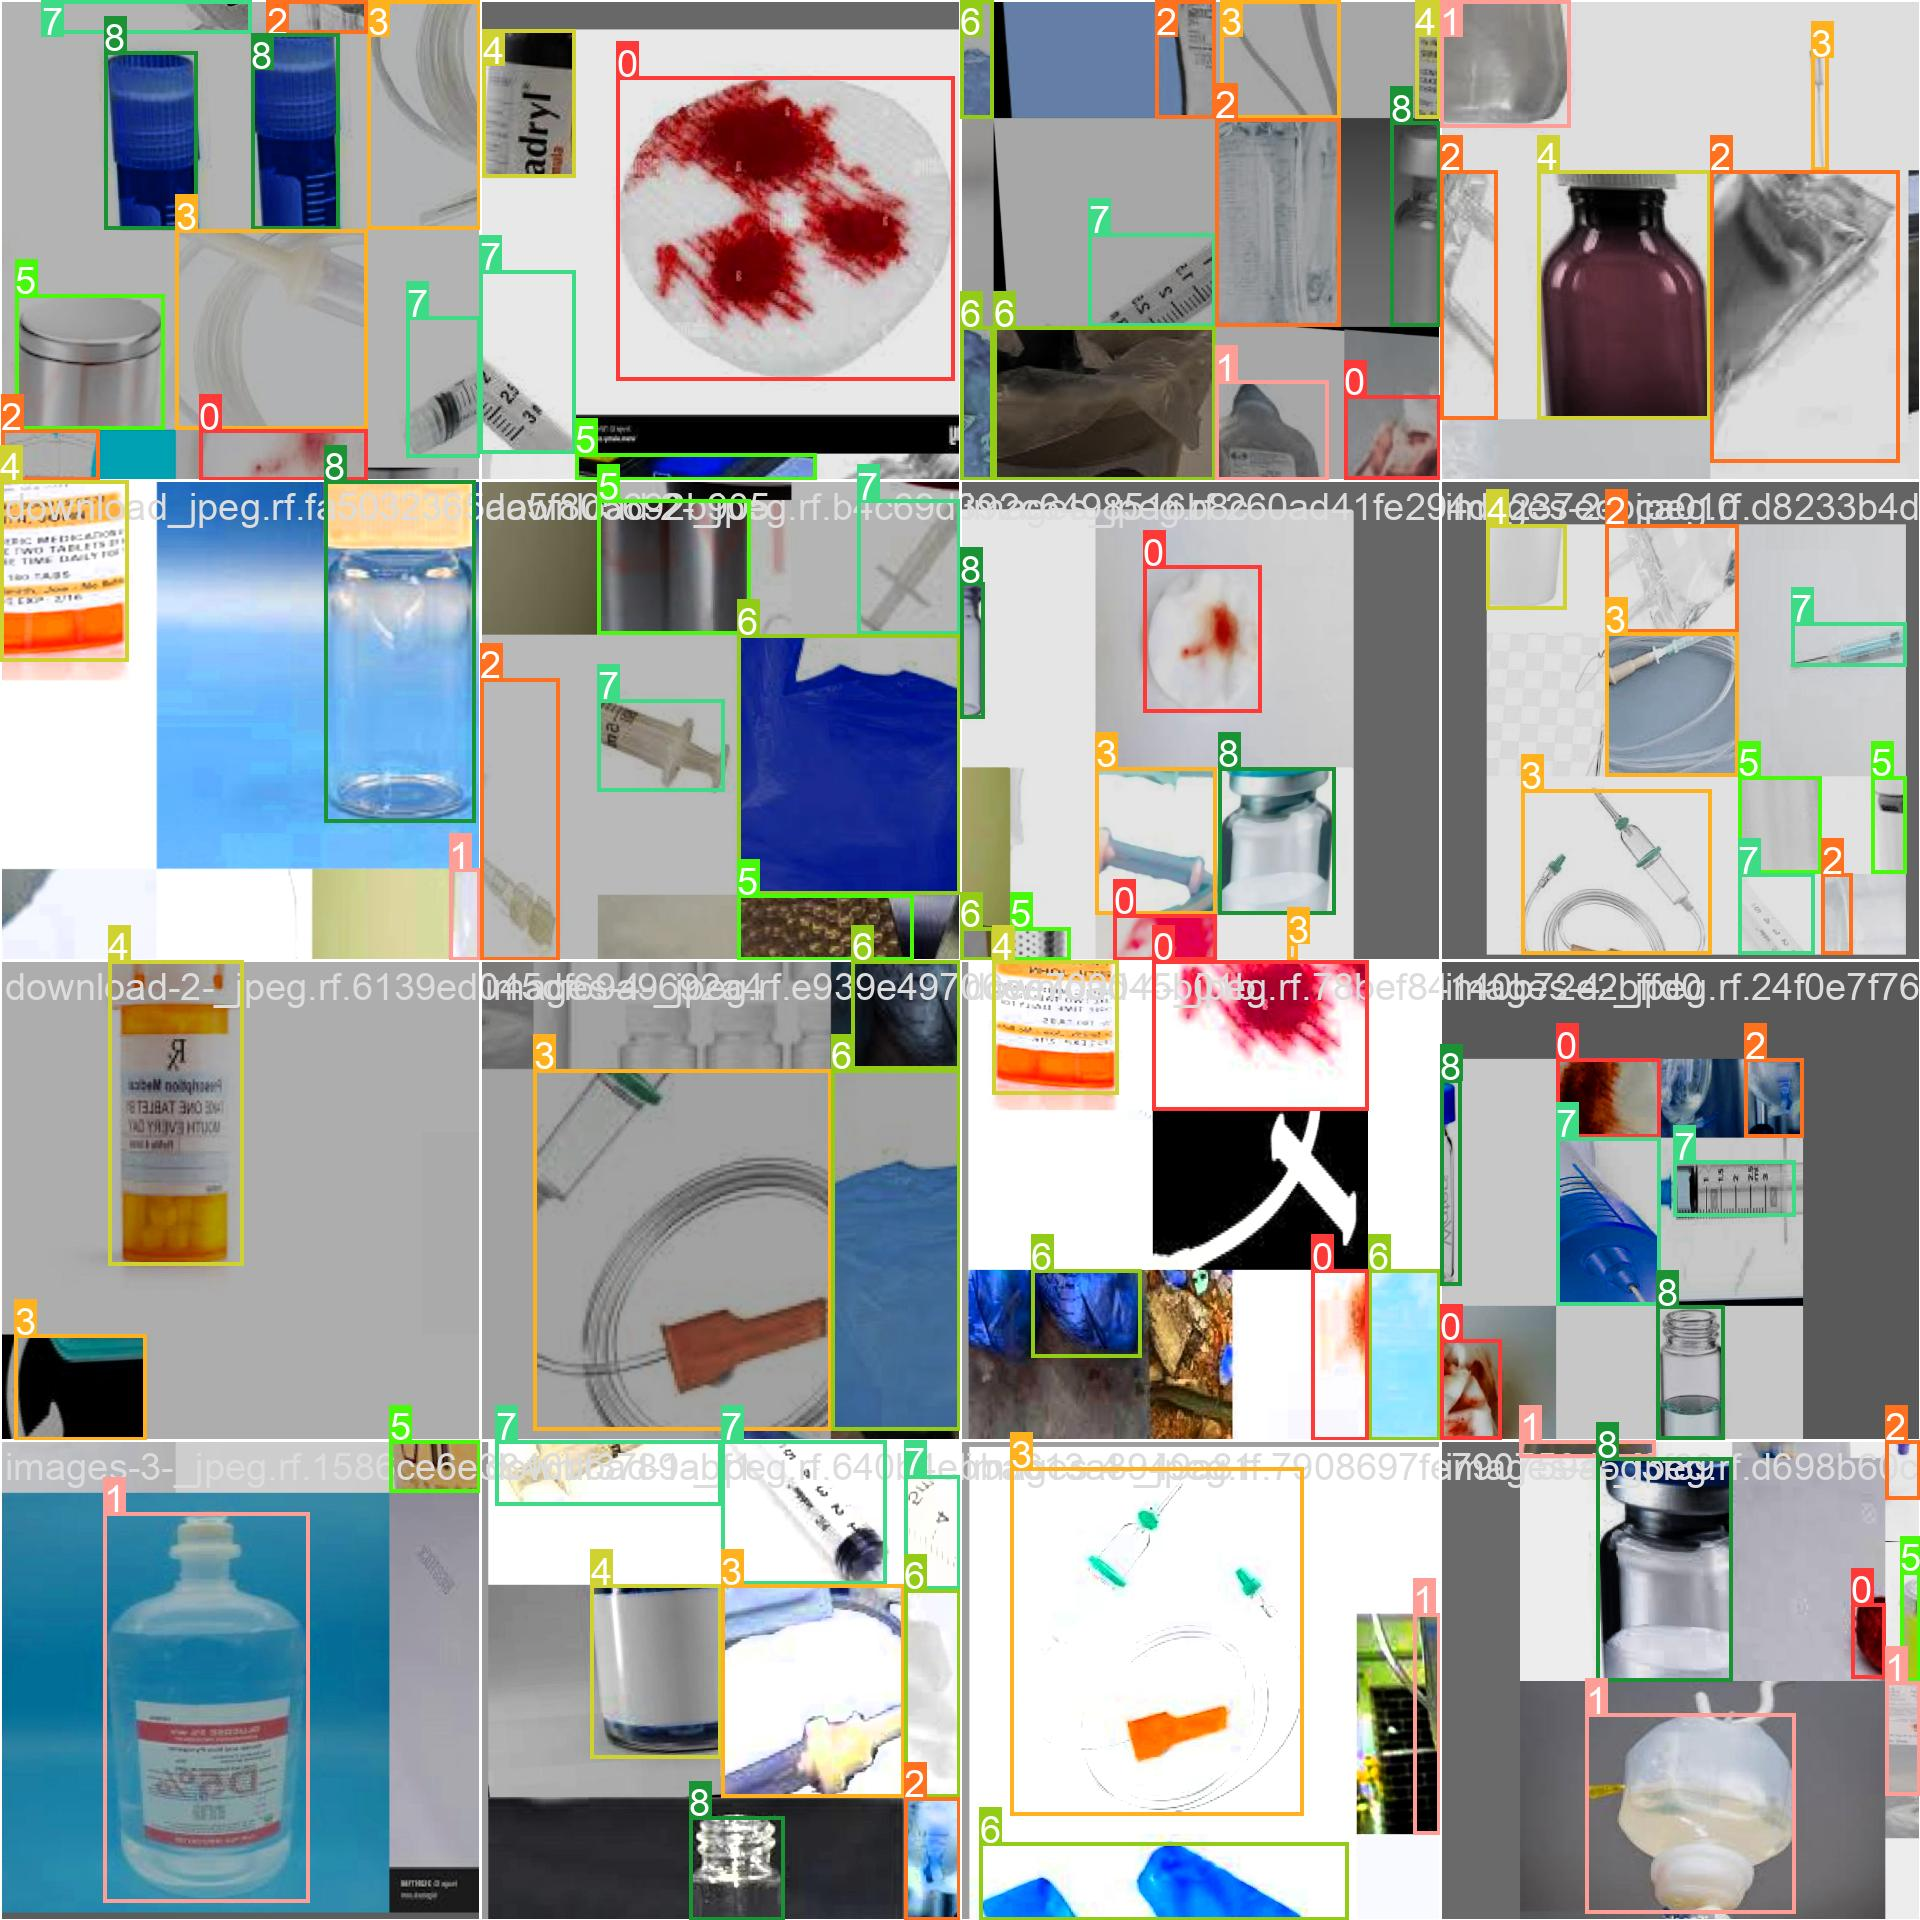

In [37]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg', width=600)

/kaggle/working


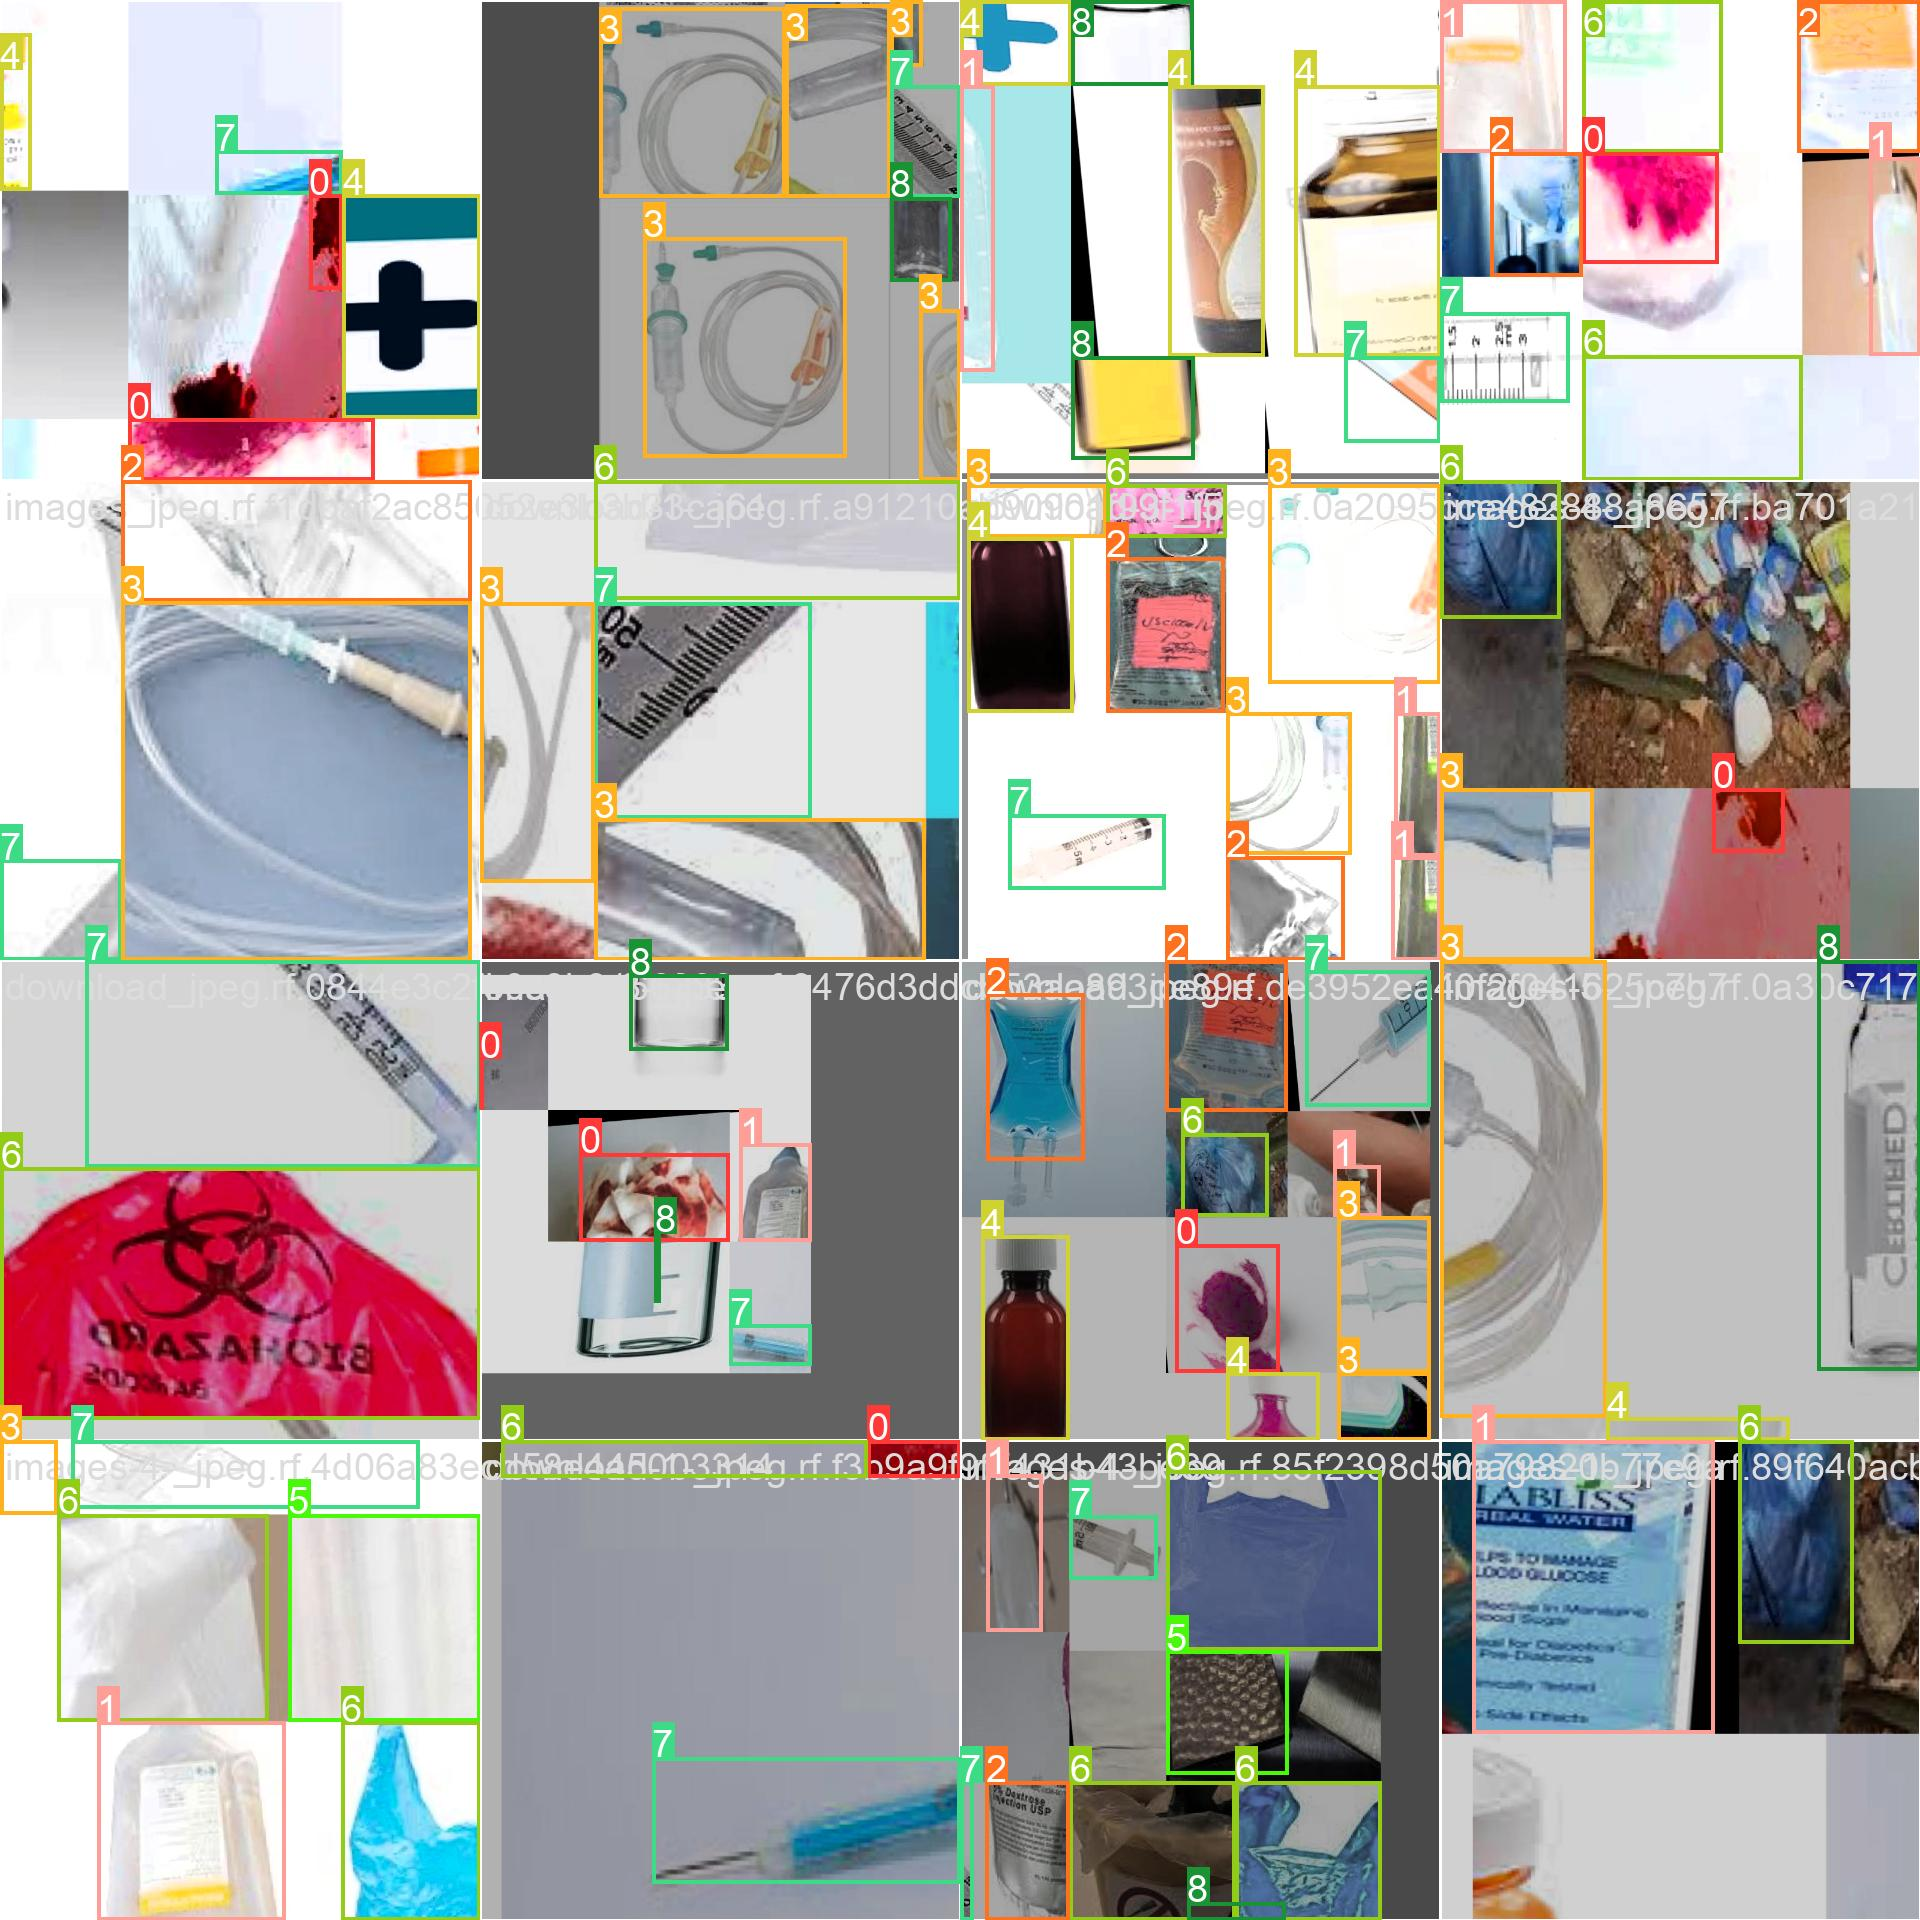

In [38]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch2.jpg', width=600)

/kaggle/working


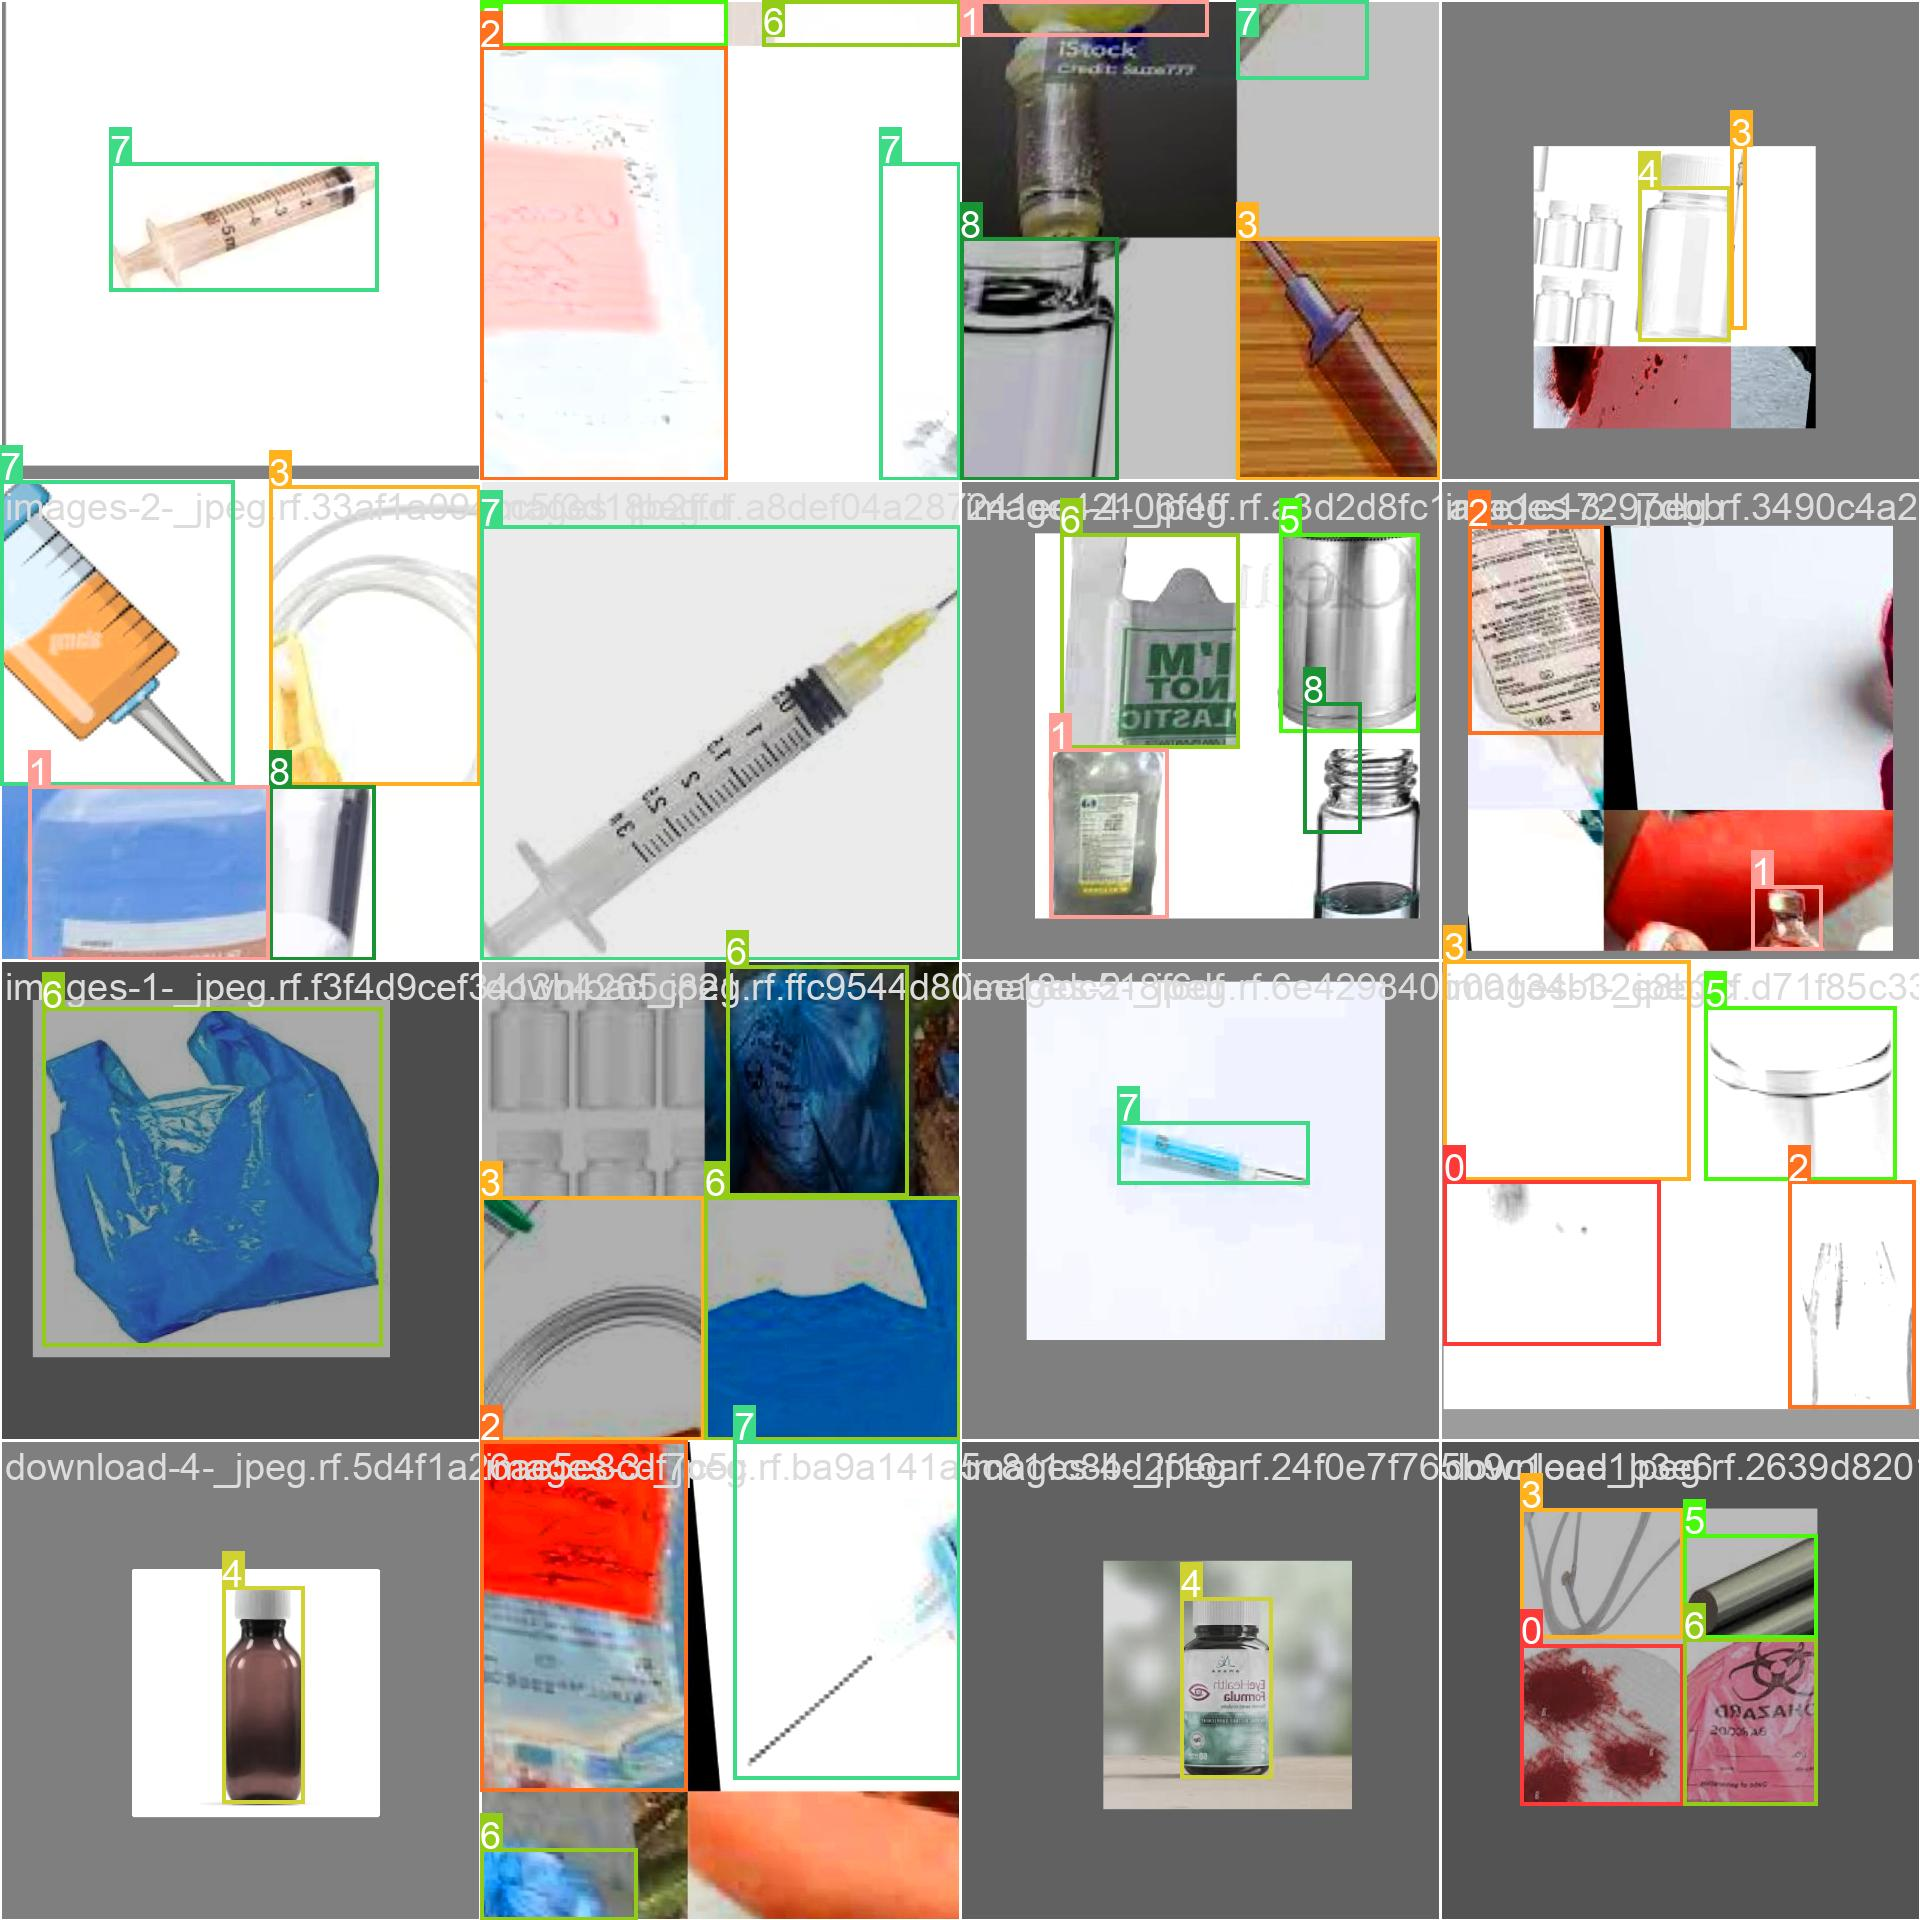

In [39]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch910.jpg', width=600)

/kaggle/working


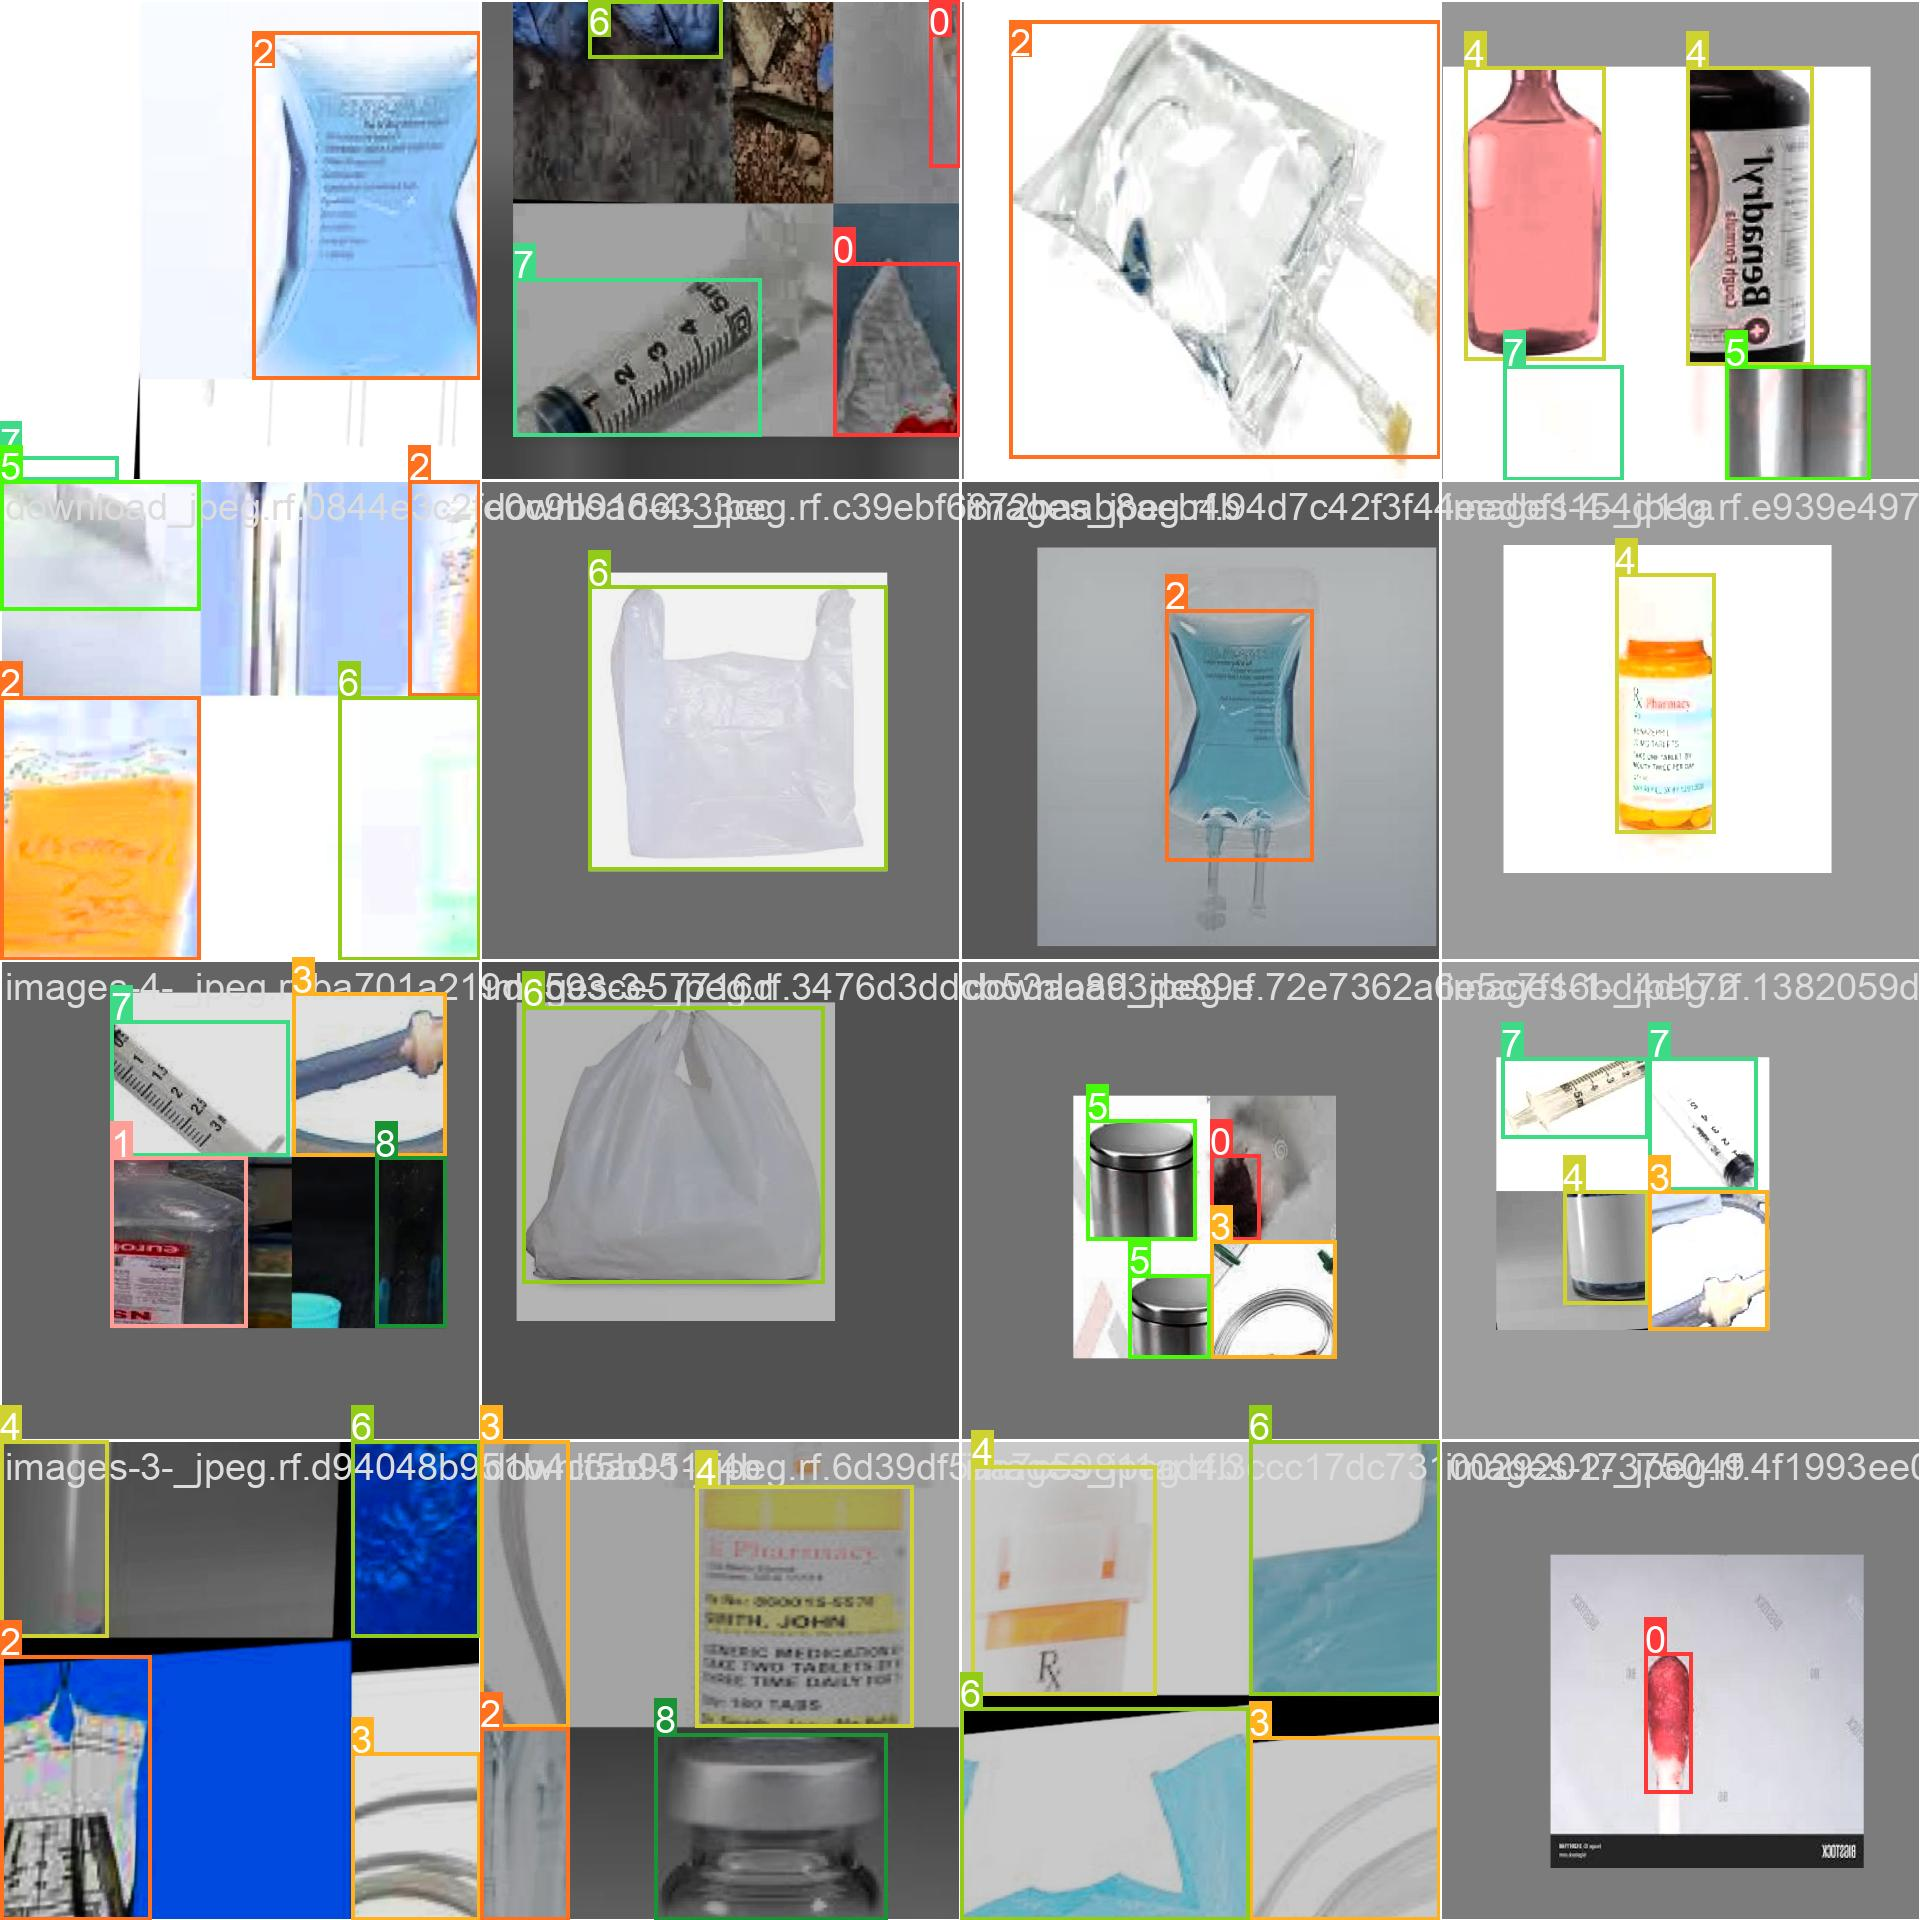

In [40]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch911.jpg', width=600)

/kaggle/working


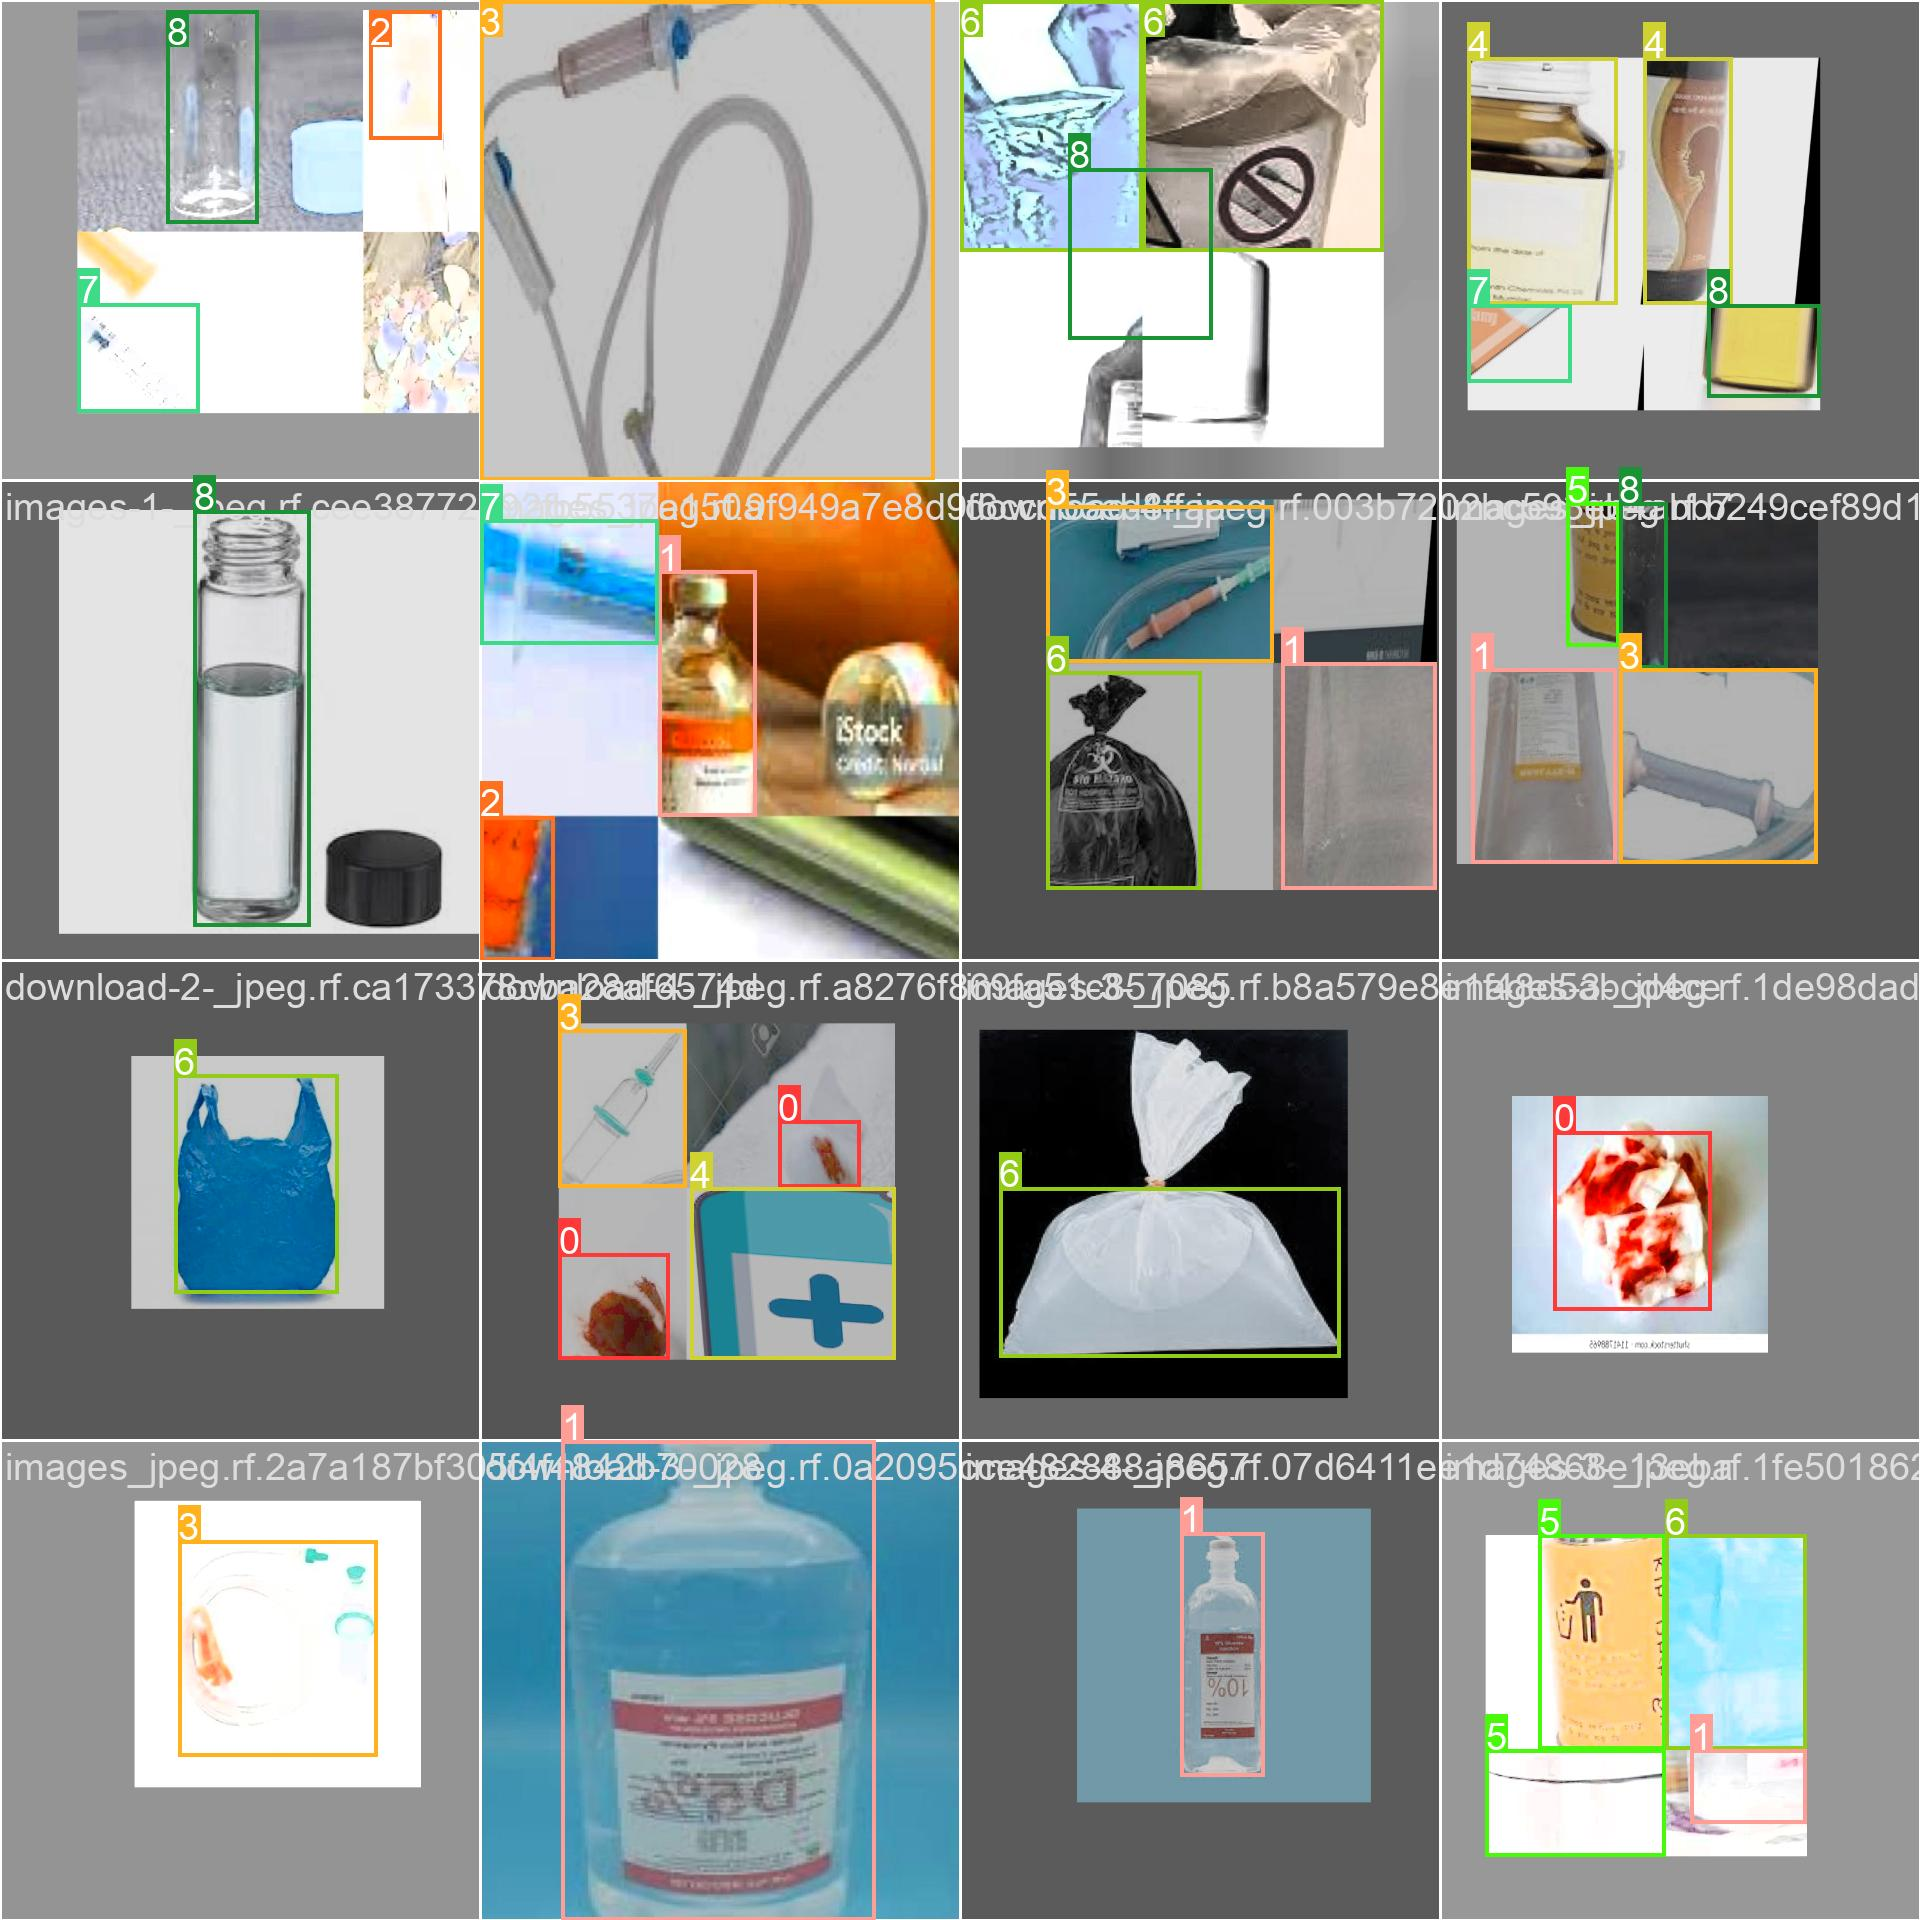

In [41]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch912.jpg', width=600)

/kaggle/working


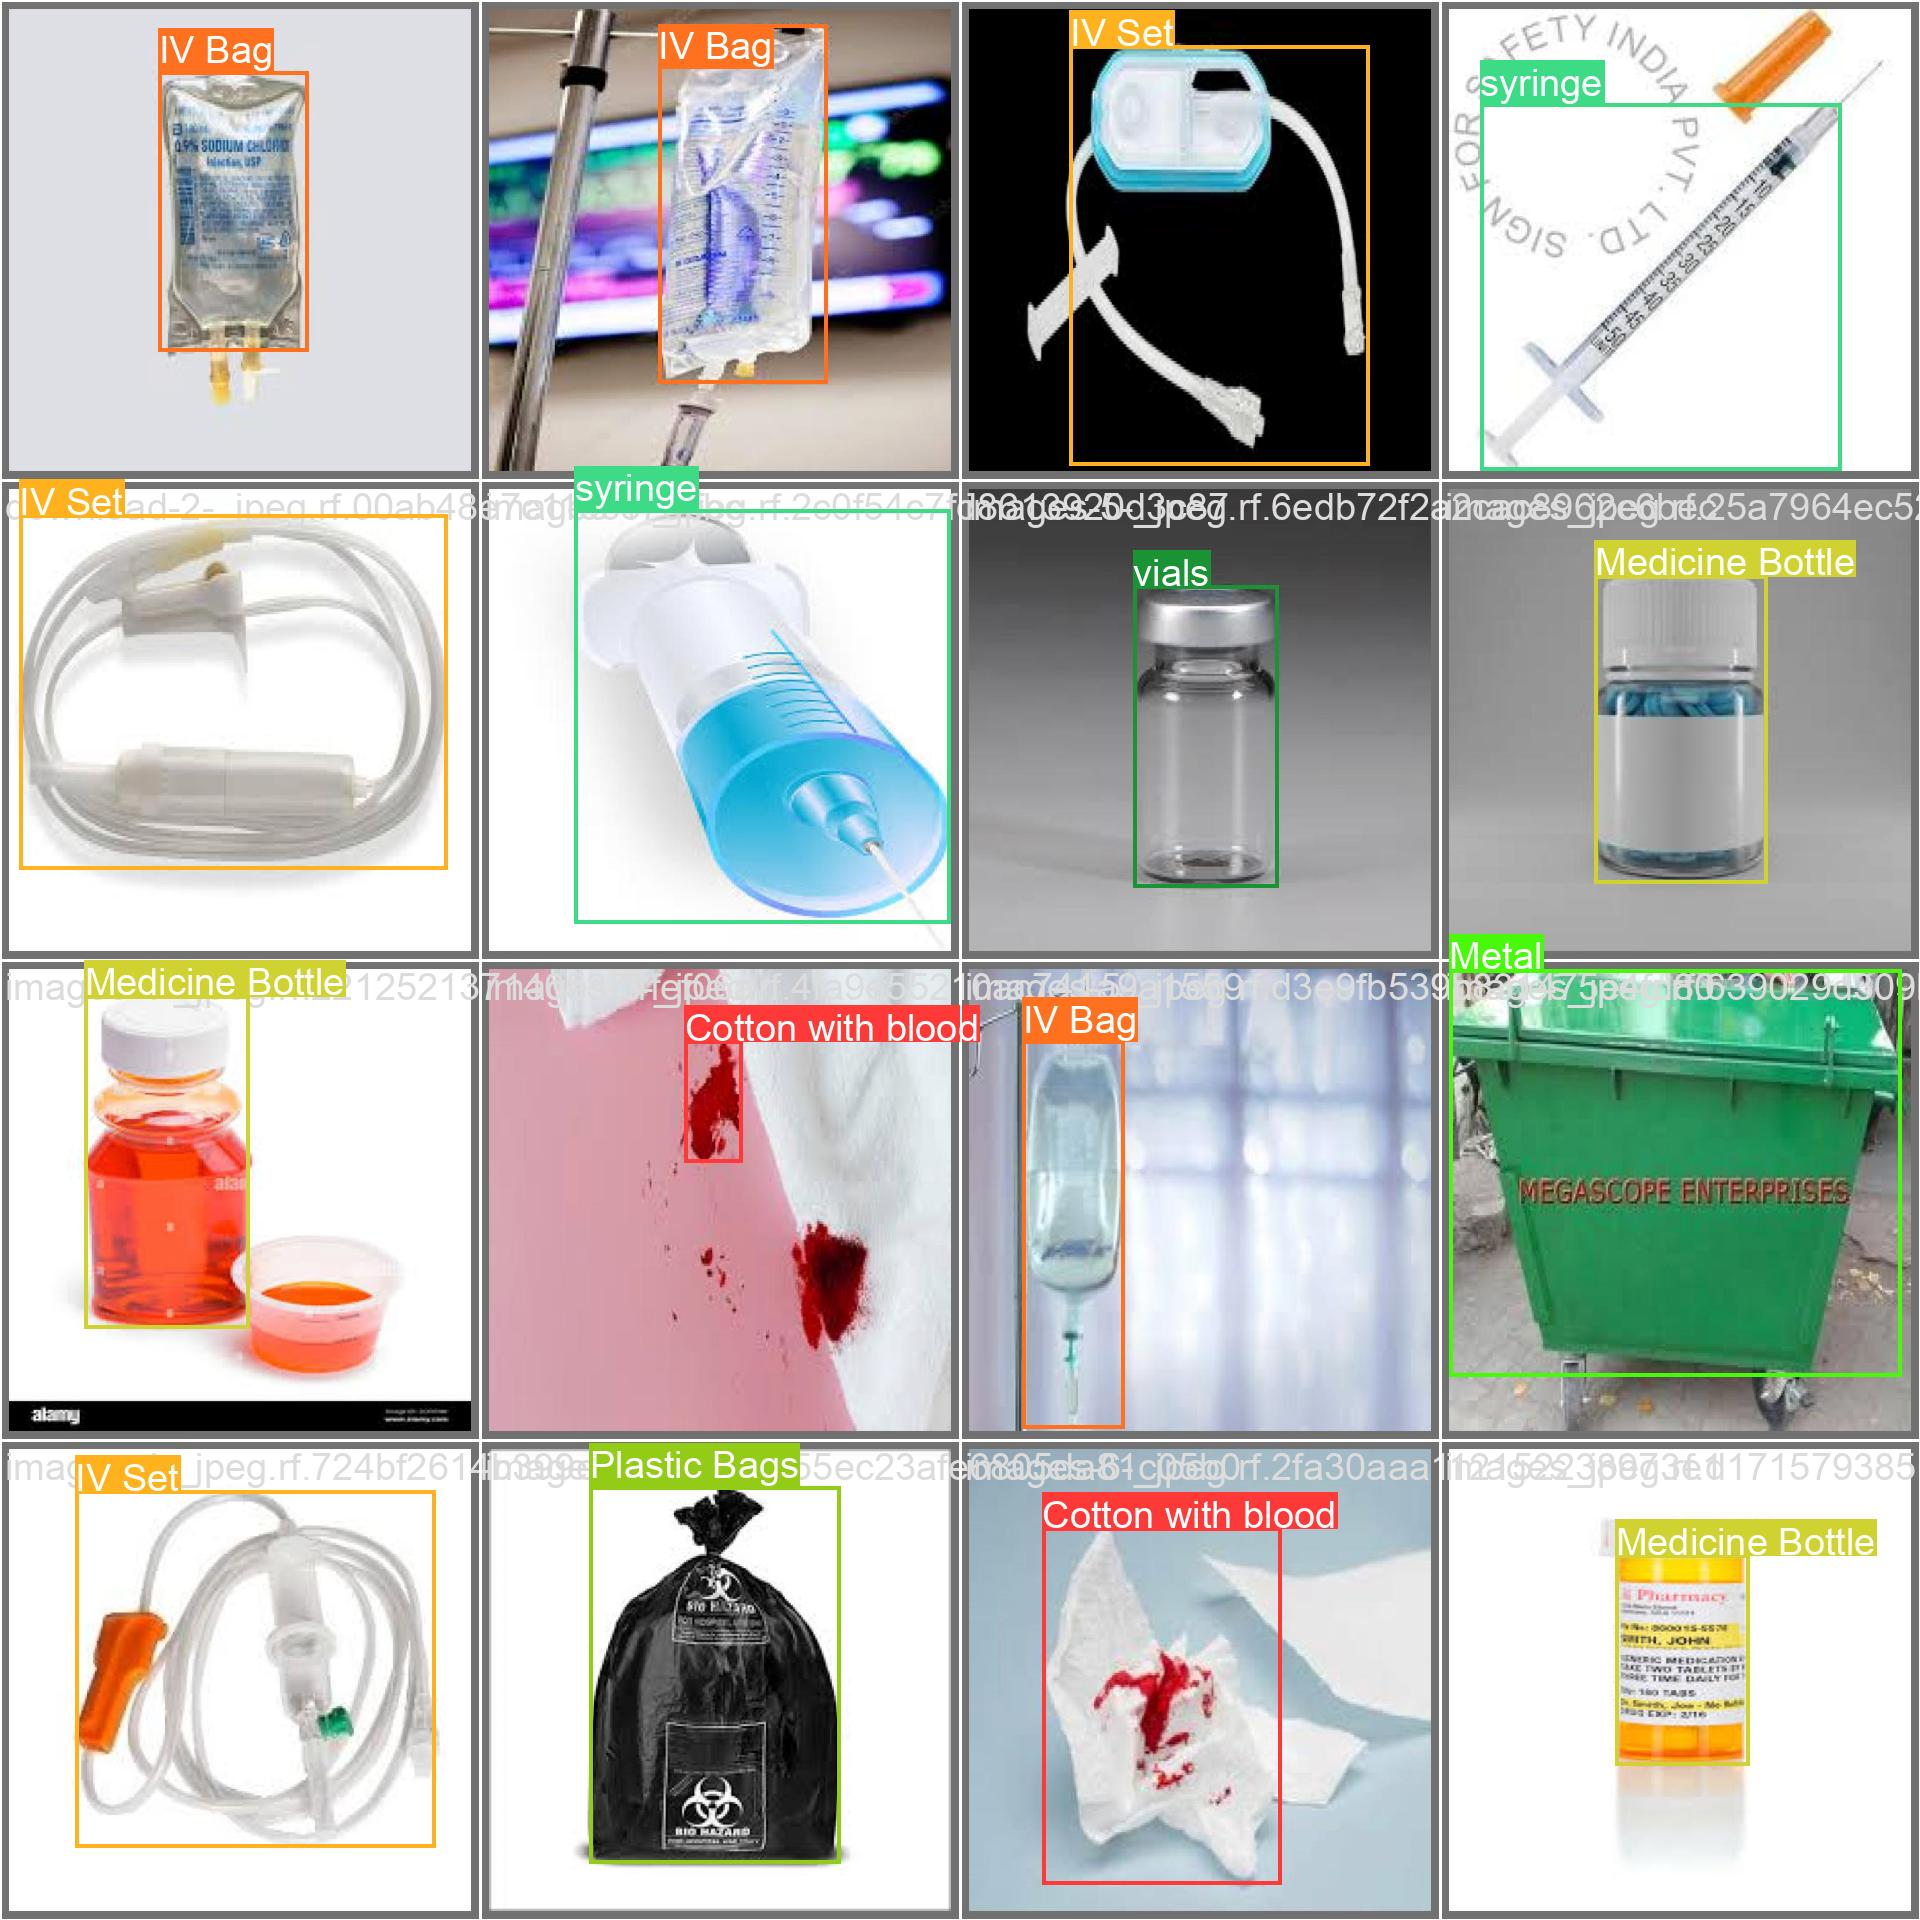

In [42]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

/kaggle/working


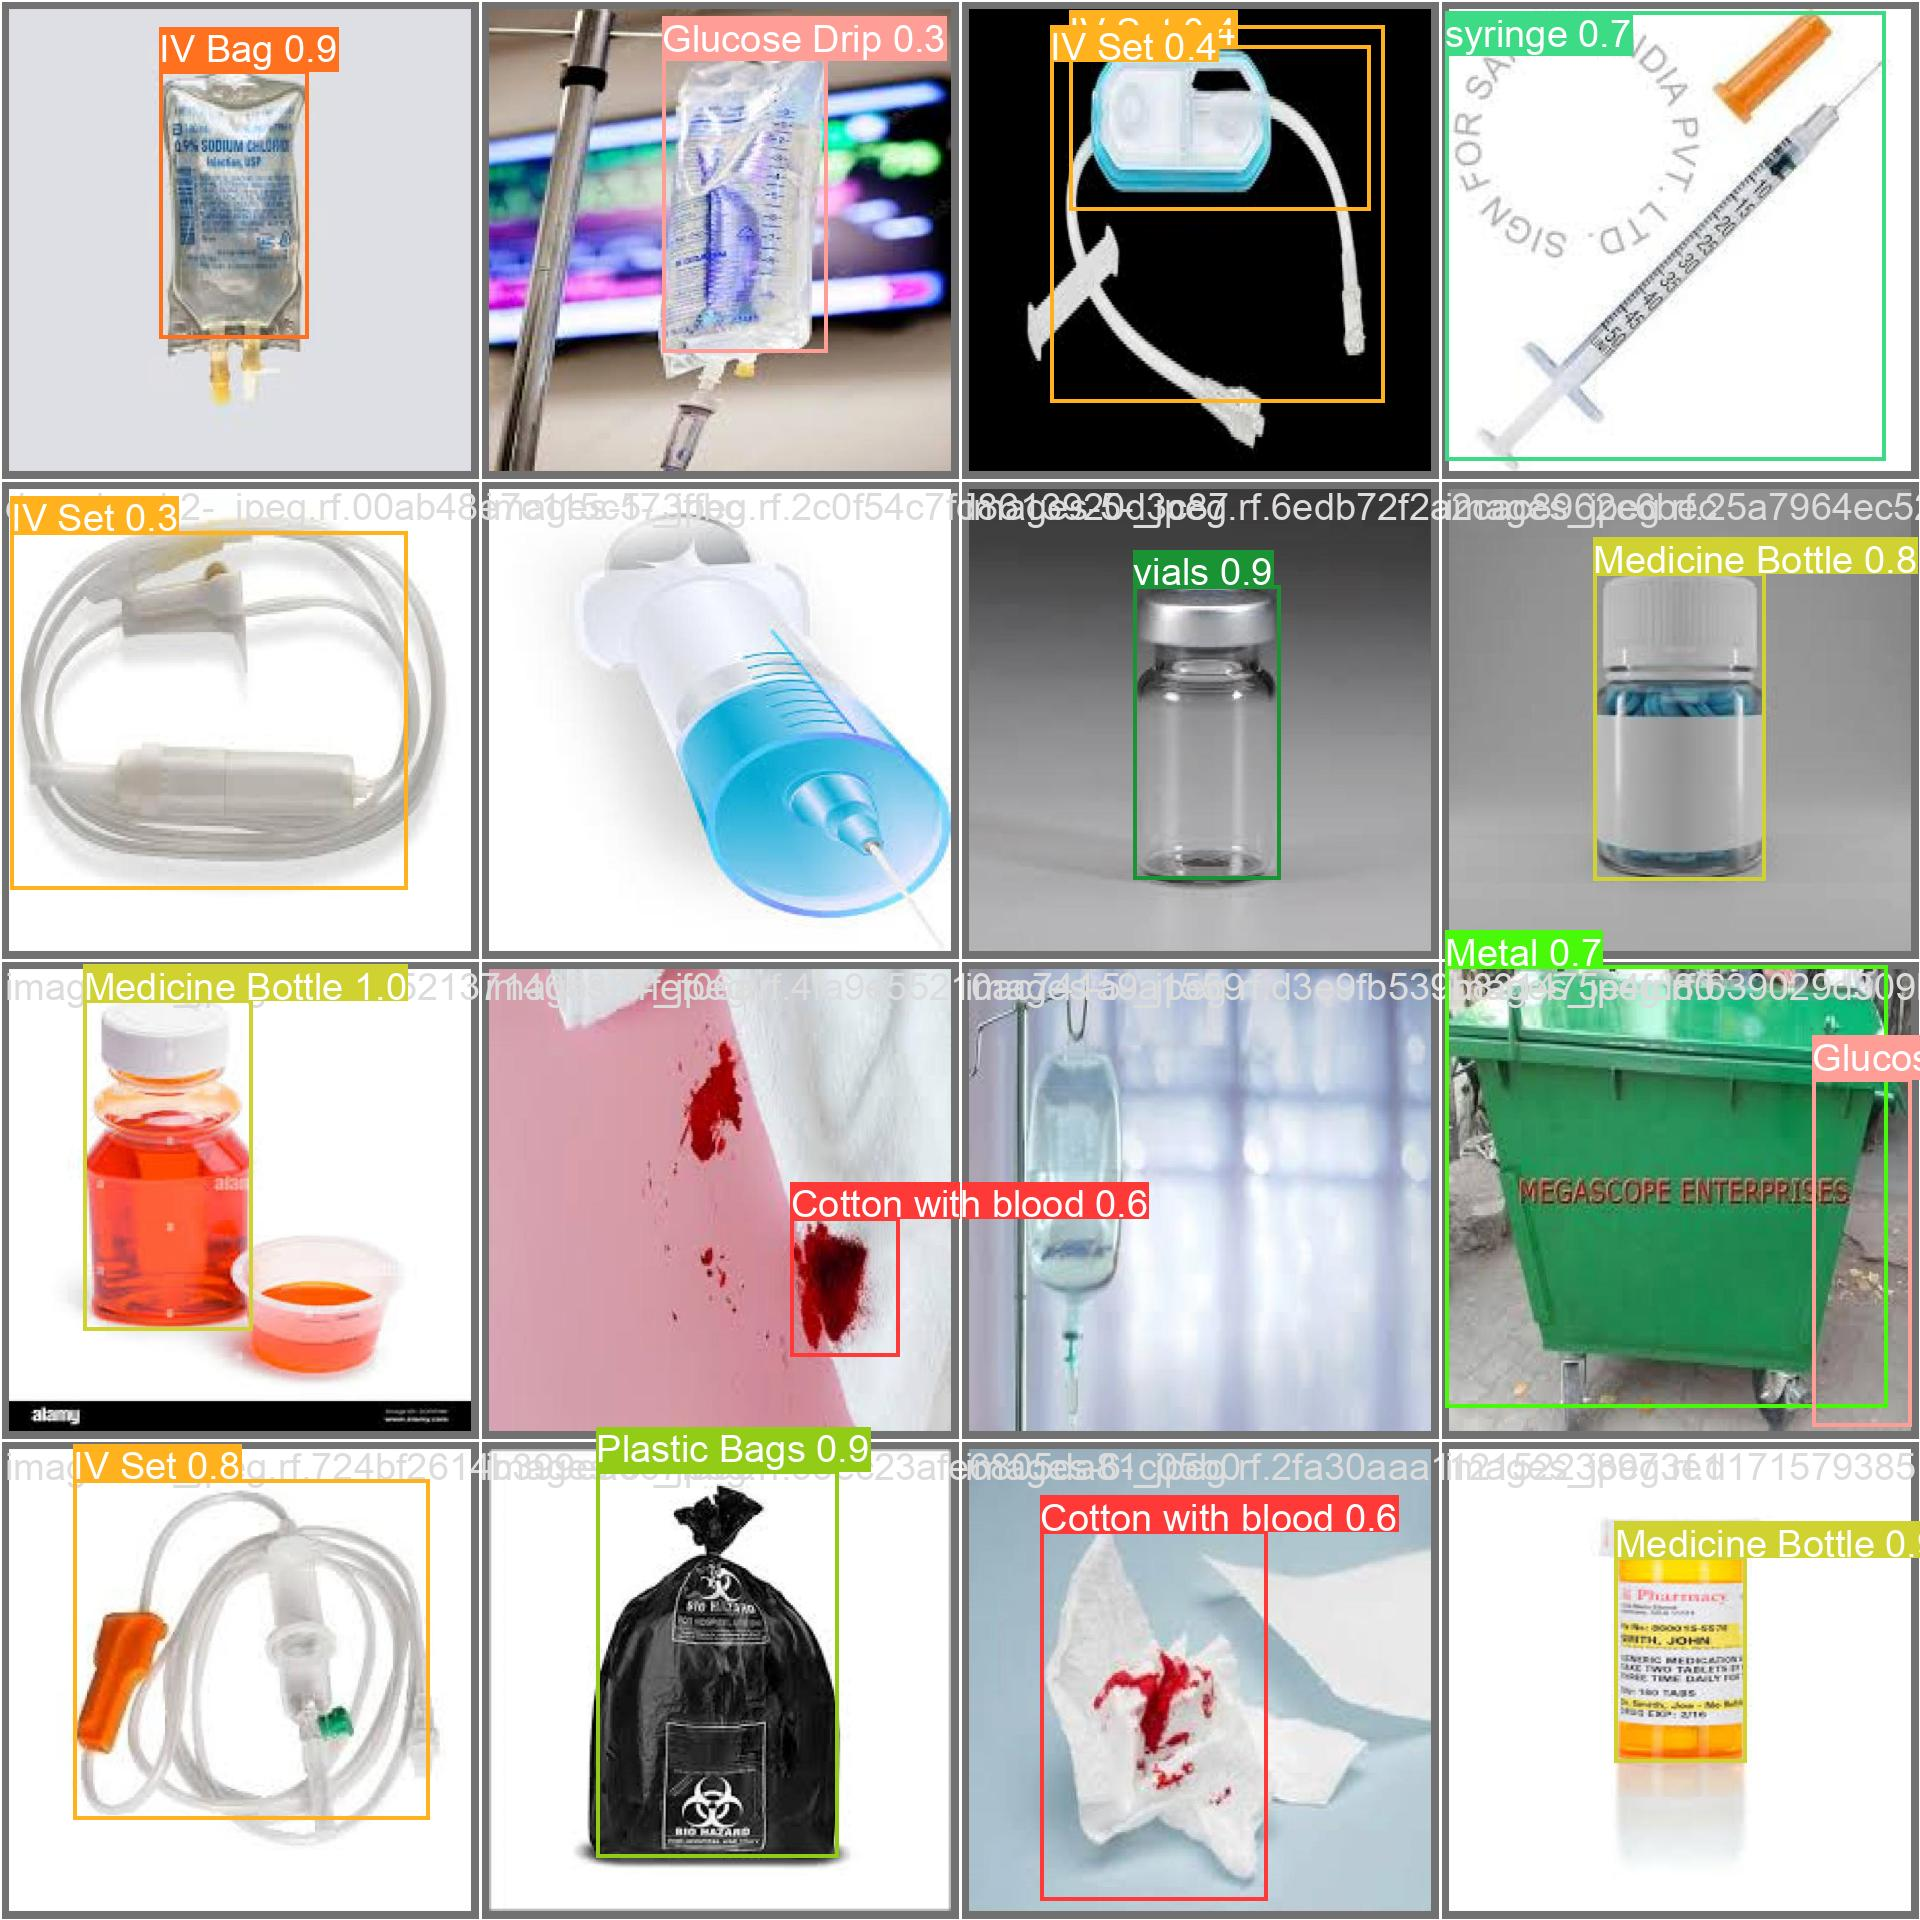

In [43]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/kaggle/working


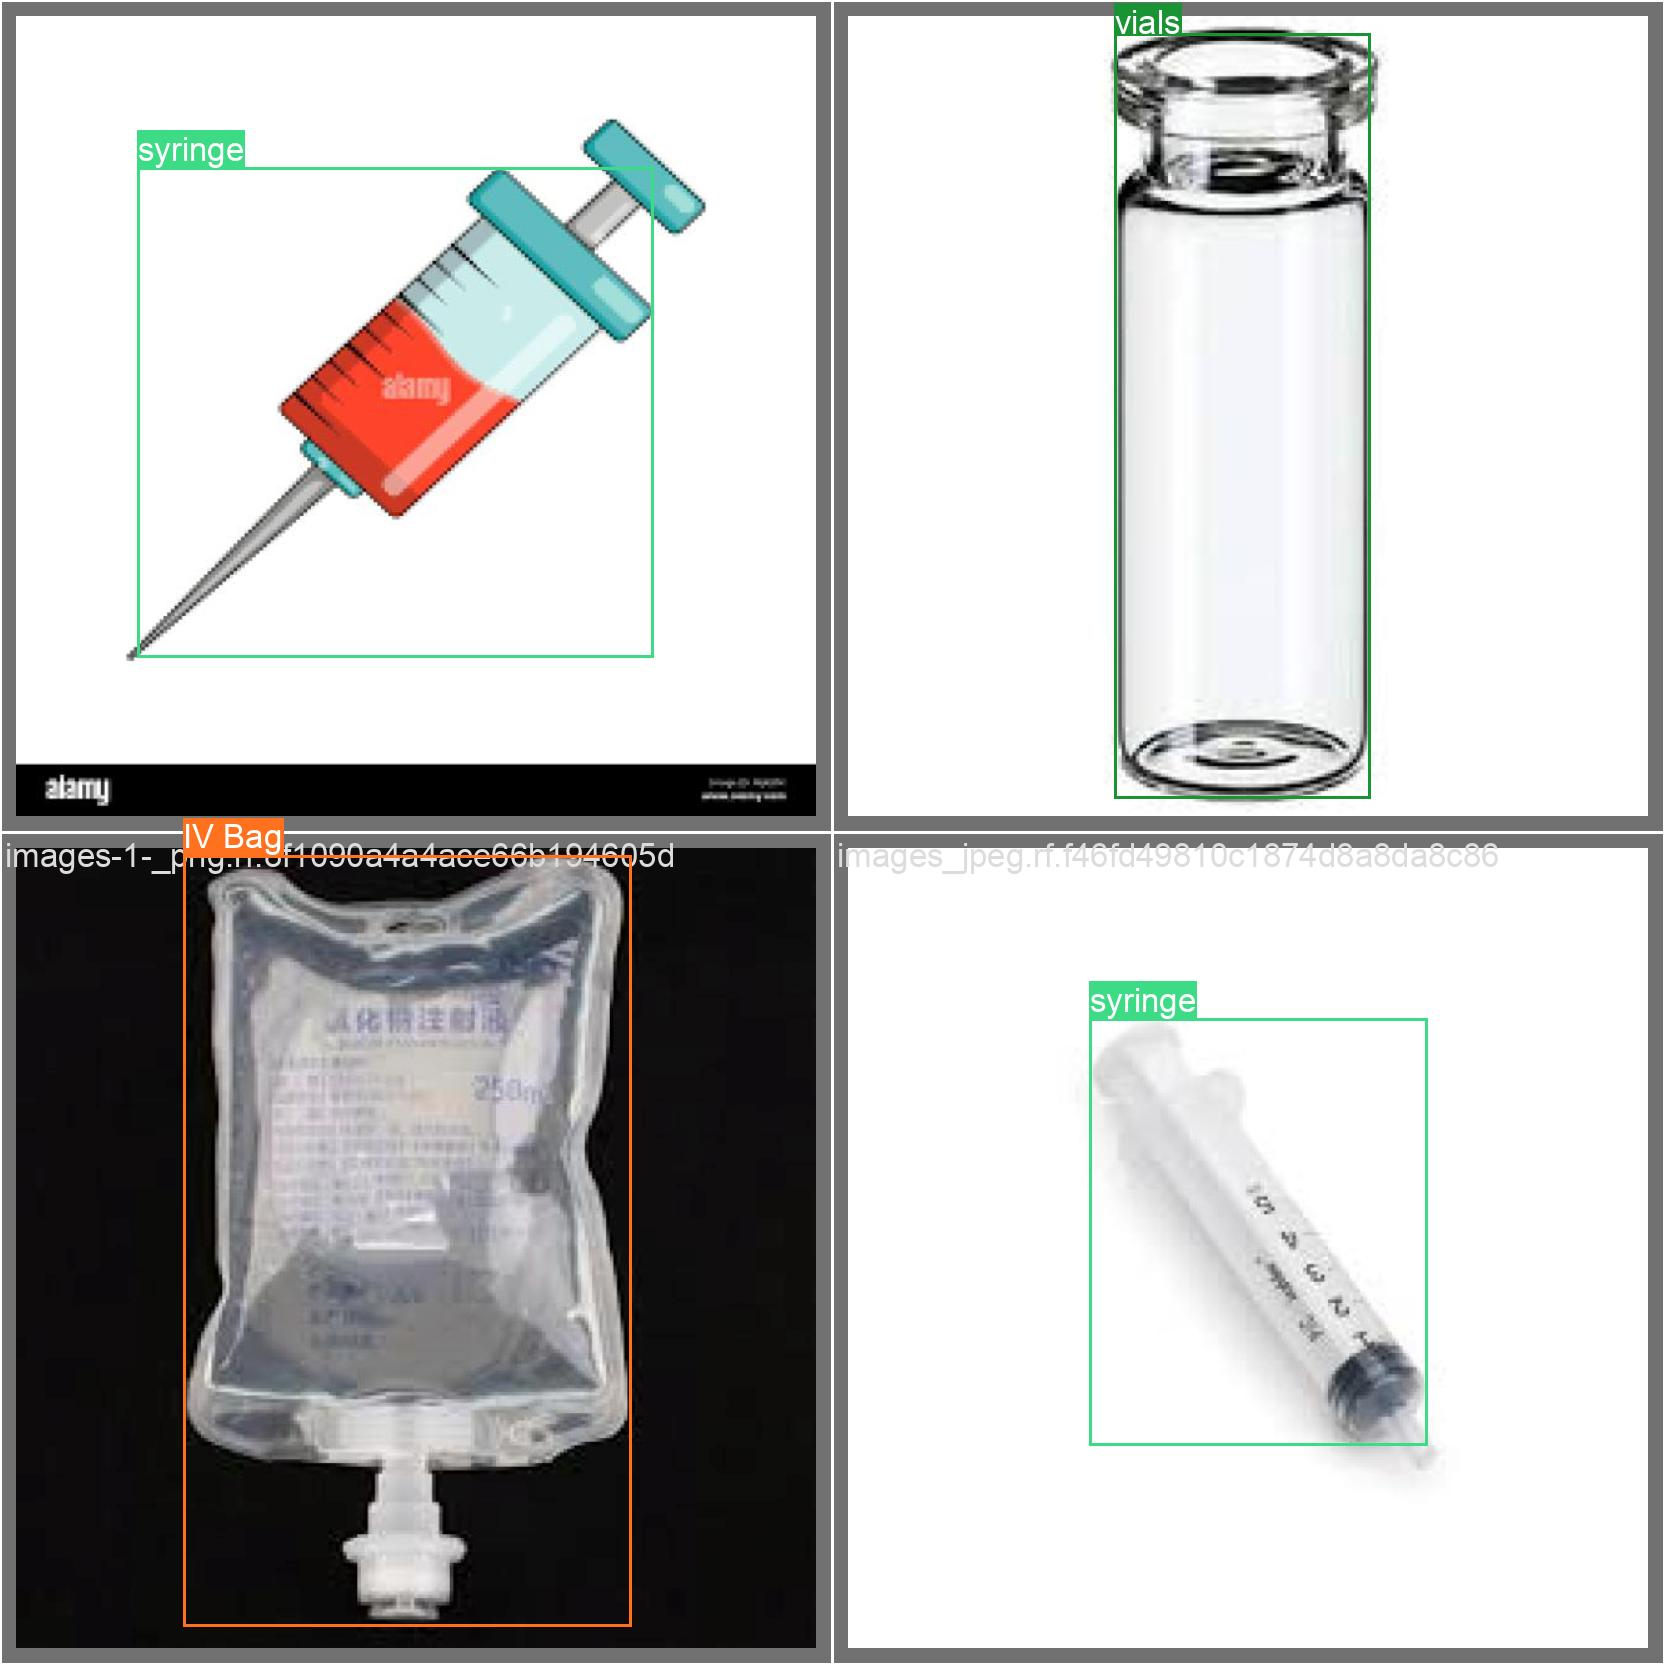

In [44]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_labels.jpg', width=600)

/kaggle/working


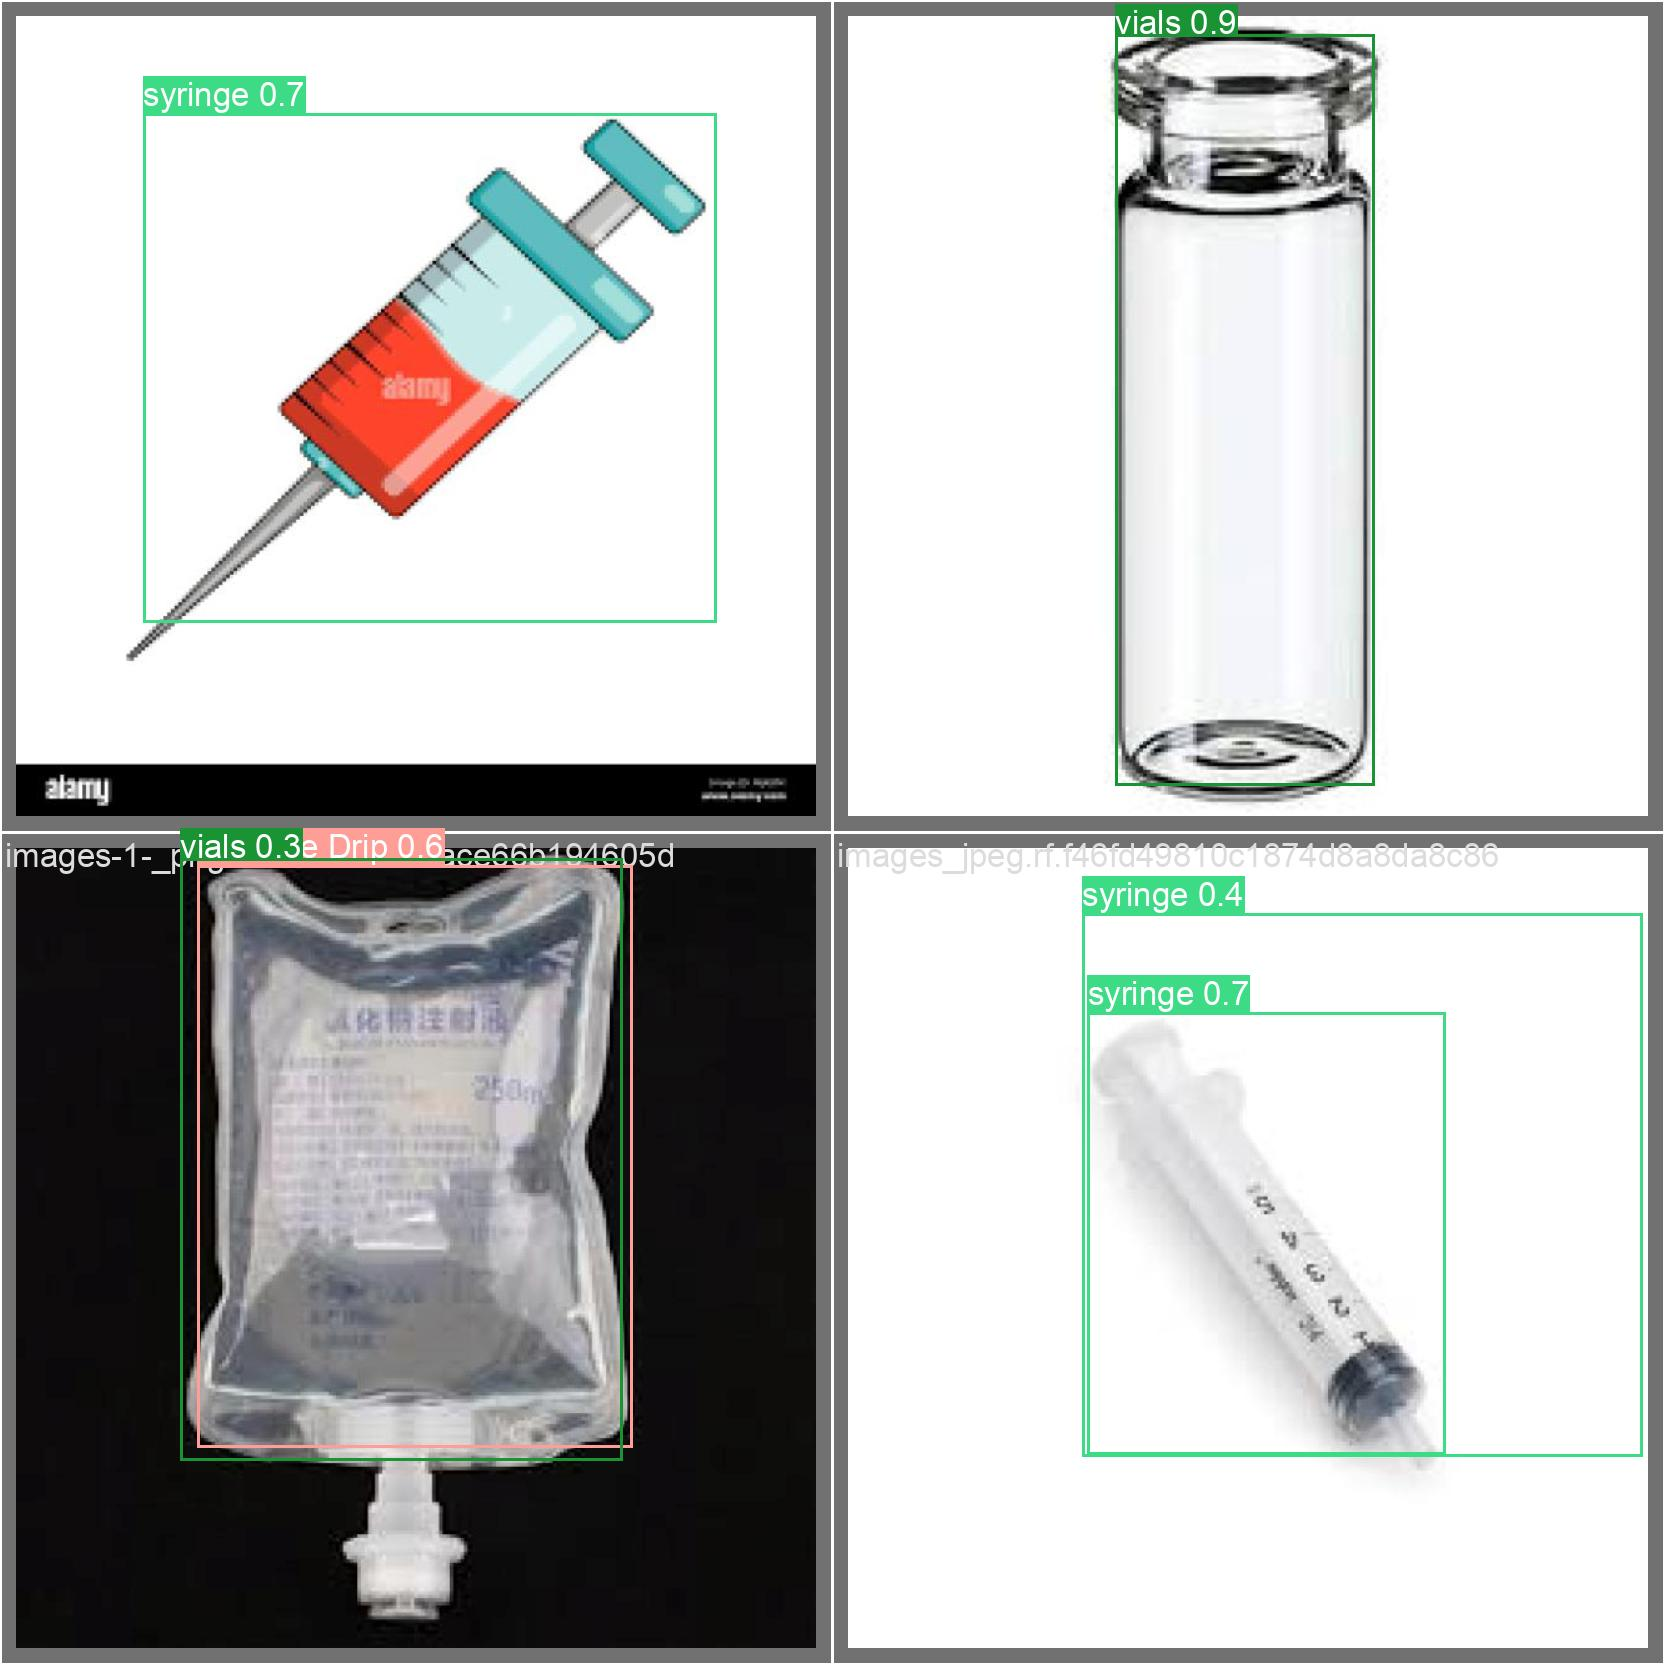

In [45]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [46]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/datasets/waste-7/valid/labels.cache... 36 images, 
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 35, len(boxes) = 36. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         36         36      0.884      0.784      0.928      0.711
     Cotton with blood         36          4      0

## Inference with Custom Model

In [47]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
image 1/27 /kaggle/working/datasets/waste-7/test/images/download-1-_jpeg.rf.6b948462a27ea0e8dce01a4fe877de3f.jpg: 800x800 1 Medicine Bottle, 22.4ms
image 2/27 /kaggle/working/datasets/waste-7/test/images/download-1-_jpeg.rf.bd6d59d96ac9b14a4881ce35f87d4a57.jpg: 800x800 1 Cotton with blood, 23.2ms
image 3/27 /kaggle/working/datasets/waste-7/test/images/download-1-_jpeg.rf.f3142589985a2c48752fe283f7668c73.jpg: 800x800 1 syringe, 22.4ms
image 4/27 /kaggle/working/datasets/waste-7/test/images/download-2-_jpeg.rf.cf967a436540947e147ad8b96be6d1e6.jpg: 800x800 1 Medicine B

**NOTE:** Let's take a look at few results.

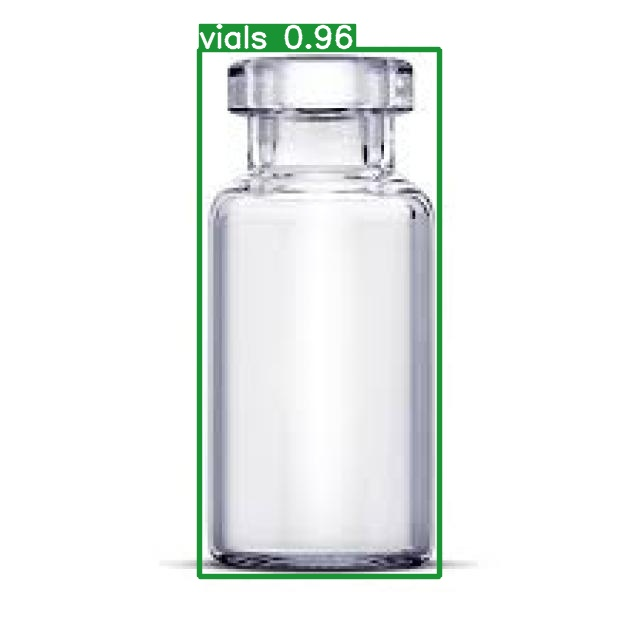

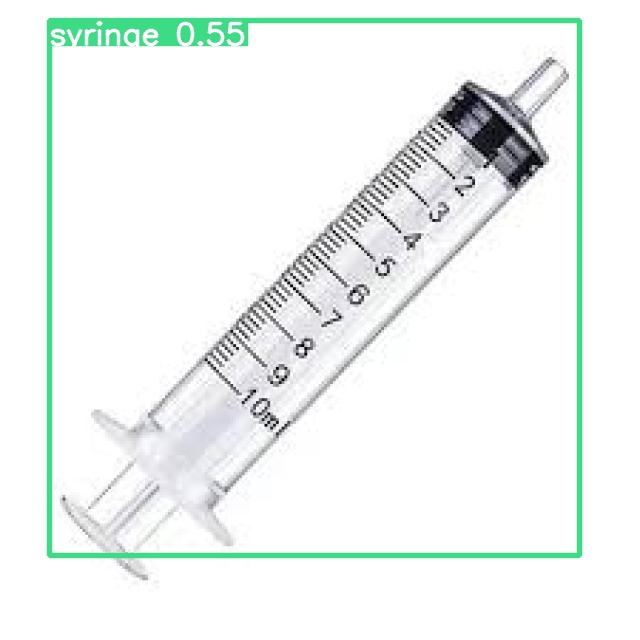

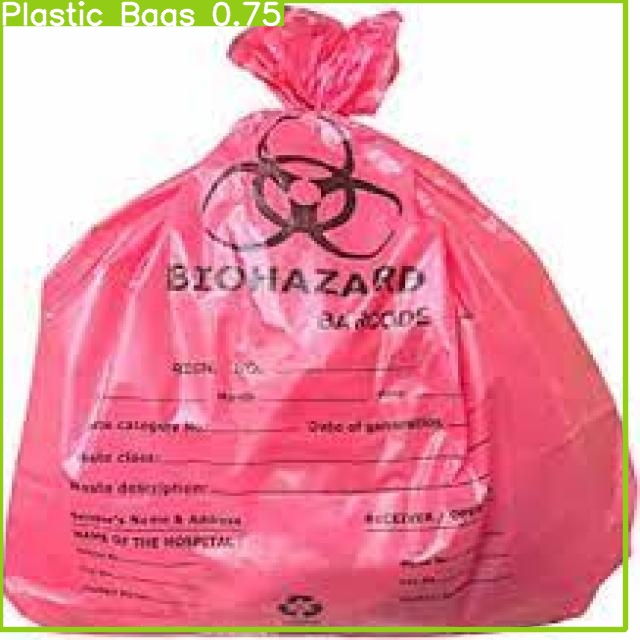

In [48]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._